In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/EstData.csv')

In [3]:
df

,ID,BW,COMED,DOSE,TIME,DV,EVID,MDV,AMT,CMT,DVID
0,1,58,0,0,0,18.617400,0,0,0,3,2
1,1,58,0,0,1,13.778300,0,0,0,3,2
2,1,58,0,0,2,16.574700,0,0,0,3,2
3,1,58,0,0,4,16.848600,0,0,0,3,2
4,1,58,0,0,8,18.645900,0,0,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...
2815,48,61,0,10,840,3.377700,0,0,0,3,2
2816,48,61,0,10,1008,1.548160,0,0,0,2,1
2817,48,61,0,10,1008,3.438450,0,0,0,3,2
2818,48,61,0,10,1176,0.689746,0,0,0,2,1


In [12]:
# 데이터 기본 정보 확인
print("=== 데이터 기본 정보 ===")
print(f"데이터 크기: {df.shape}")
print(f"컬럼명: {list(df.columns)}")
print("\n=== 데이터 타입 ===")
print(df.dtypes)
print("\n=== 결측값 확인 ===")
print(df.isnull().sum())


=== 데이터 기본 정보 ===
데이터 크기: (2820, 11)
컬럼명: ['ID', 'BW', 'COMED', 'DOSE', 'TIME', 'DV', 'EVID', 'MDV', 'AMT', 'CMT', 'DVID']

=== 데이터 타입 ===
ID         int64
BW         int64
COMED      int64
DOSE       int64
TIME       int64
DV       float64
EVID       int64
MDV        int64
AMT        int64
CMT        int64
DVID       int64
dtype: object

=== 결측값 확인 ===
ID       0
BW       0
COMED    0
DOSE     0
TIME     0
DV       0
EVID     0
MDV      0
AMT      0
CMT      0
DVID     0
dtype: int64


In [13]:
# 기술통계 분석
print("=== 기술통계 ===")
print(df.describe())


=== 기술통계 ===
                ID           BW        COMED         DOSE         TIME  \
count  2820.000000  2820.000000  2820.000000  2820.000000  2820.000000   
mean     27.946809    73.081560     0.484043     4.170213   331.531915   
std      12.349728    15.728285     0.499834     3.921828   301.603536   
min       1.000000    51.000000     0.000000     0.000000     0.000000   
25%      18.000000    58.000000     0.000000     1.000000    36.000000   
50%      28.000000    70.000000     0.000000     3.000000   336.000000   
75%      38.000000    88.000000     1.000000    10.000000   488.000000   
max      48.000000   100.000000     1.000000    10.000000  1176.000000   

                DV         EVID          MDV          AMT          CMT  \
count  2820.000000  2820.000000  2820.000000  2820.000000  2820.000000   
mean      3.492624     0.268085     0.268085     1.251064     2.157447   
std       3.834767     0.443041     0.443041     2.875336     0.817964   
min       0.000000     0

In [14]:
# 각 변수의 고유값 개수 확인
print("=== 각 변수의 고유값 개수 ===")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count}개")
    if unique_count <= 20:  # 고유값이 적으면 실제 값들도 출력
        print(f"  값들: {sorted(df[col].unique())}")
    print()


=== 각 변수의 고유값 개수 ===
ID: 48개

BW: 34개

COMED: 2개
  값들: [0, 1]

DOSE: 4개
  값들: [0, 1, 3, 10]

TIME: 39개

DV: 2062개

EVID: 2개
  값들: [0, 1]

MDV: 2개
  값들: [0, 1]

AMT: 4개
  값들: [0, 1, 3, 10]

CMT: 3개
  값들: [1, 2, 3]

DVID: 3개
  값들: [0, 1, 2]



In [15]:
# 시각화 라이브러리 import
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 한글 폰트 설정 (한글이 깨지지 않도록)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# 그래프 스타일 설정
plt.style.use('default')
sns.set_palette("husl")


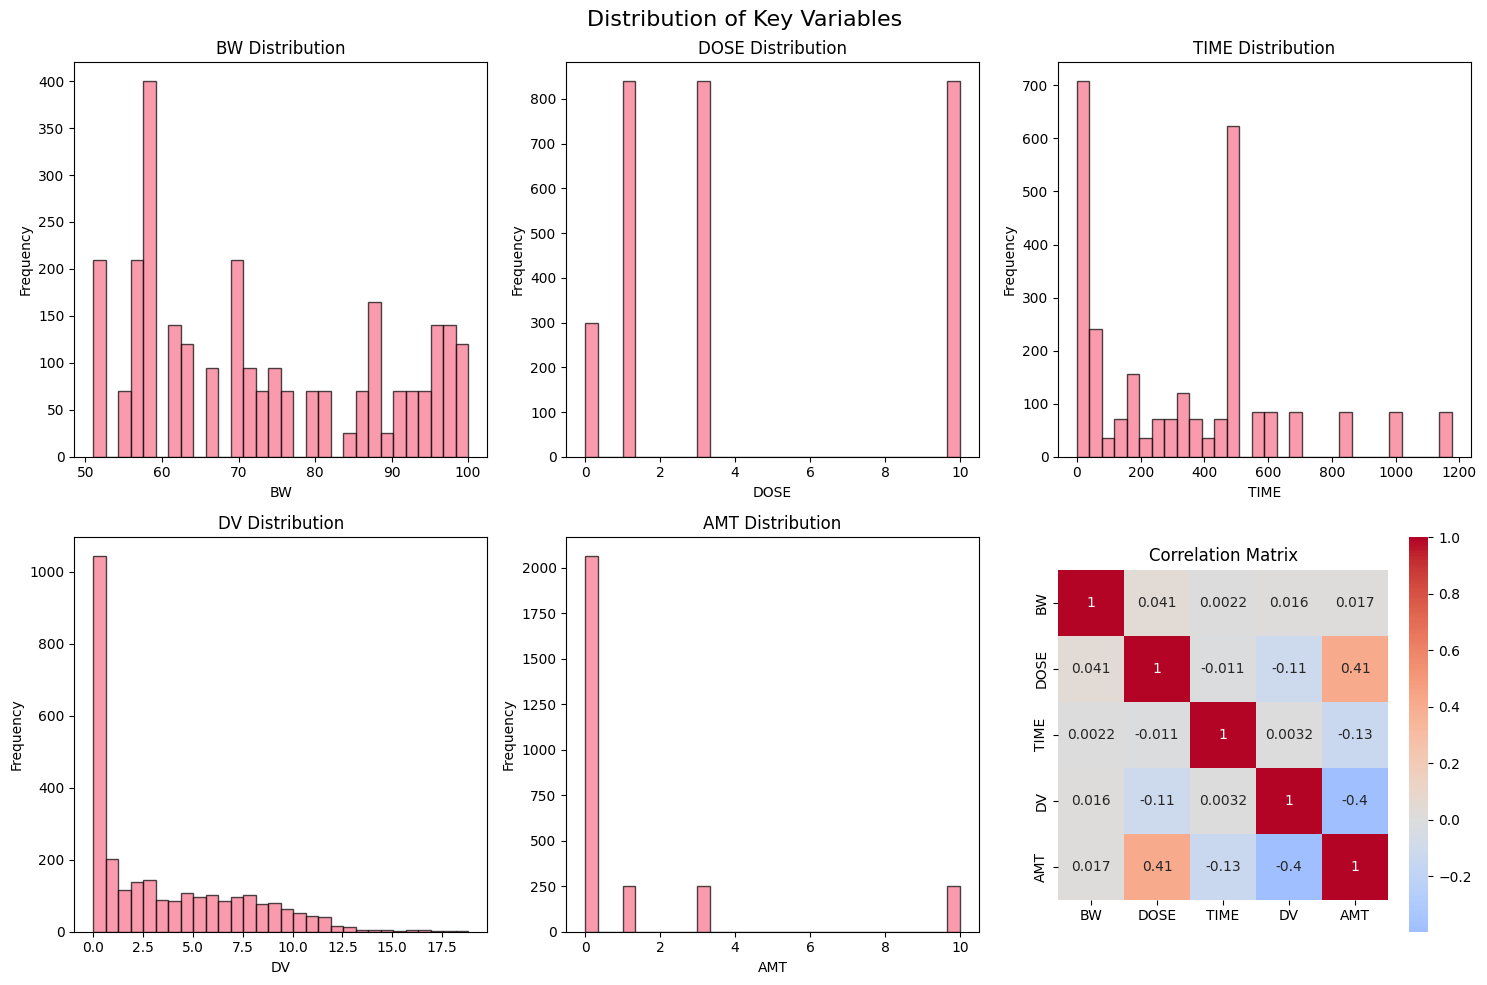

In [16]:
# 주요 수치형 변수들의 분포 시각화
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Key Variables', fontsize=16)

# 수치형 변수들
numeric_vars = ['BW', 'DOSE', 'TIME', 'DV', 'AMT']

for i, var in enumerate(numeric_vars):
    row = i // 3
    col = i % 3
    
    # 히스토그램
    axes[row, col].hist(df[var], bins=30, alpha=0.7, edgecolor='black')
    axes[row, col].set_title(f'{var} Distribution')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Frequency')

# 마지막 subplot은 상관관계 히트맵
correlation_vars = ['BW', 'DOSE', 'TIME', 'DV', 'AMT']
corr_matrix = df[correlation_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            ax=axes[1, 2], square=True)
axes[1, 2].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()


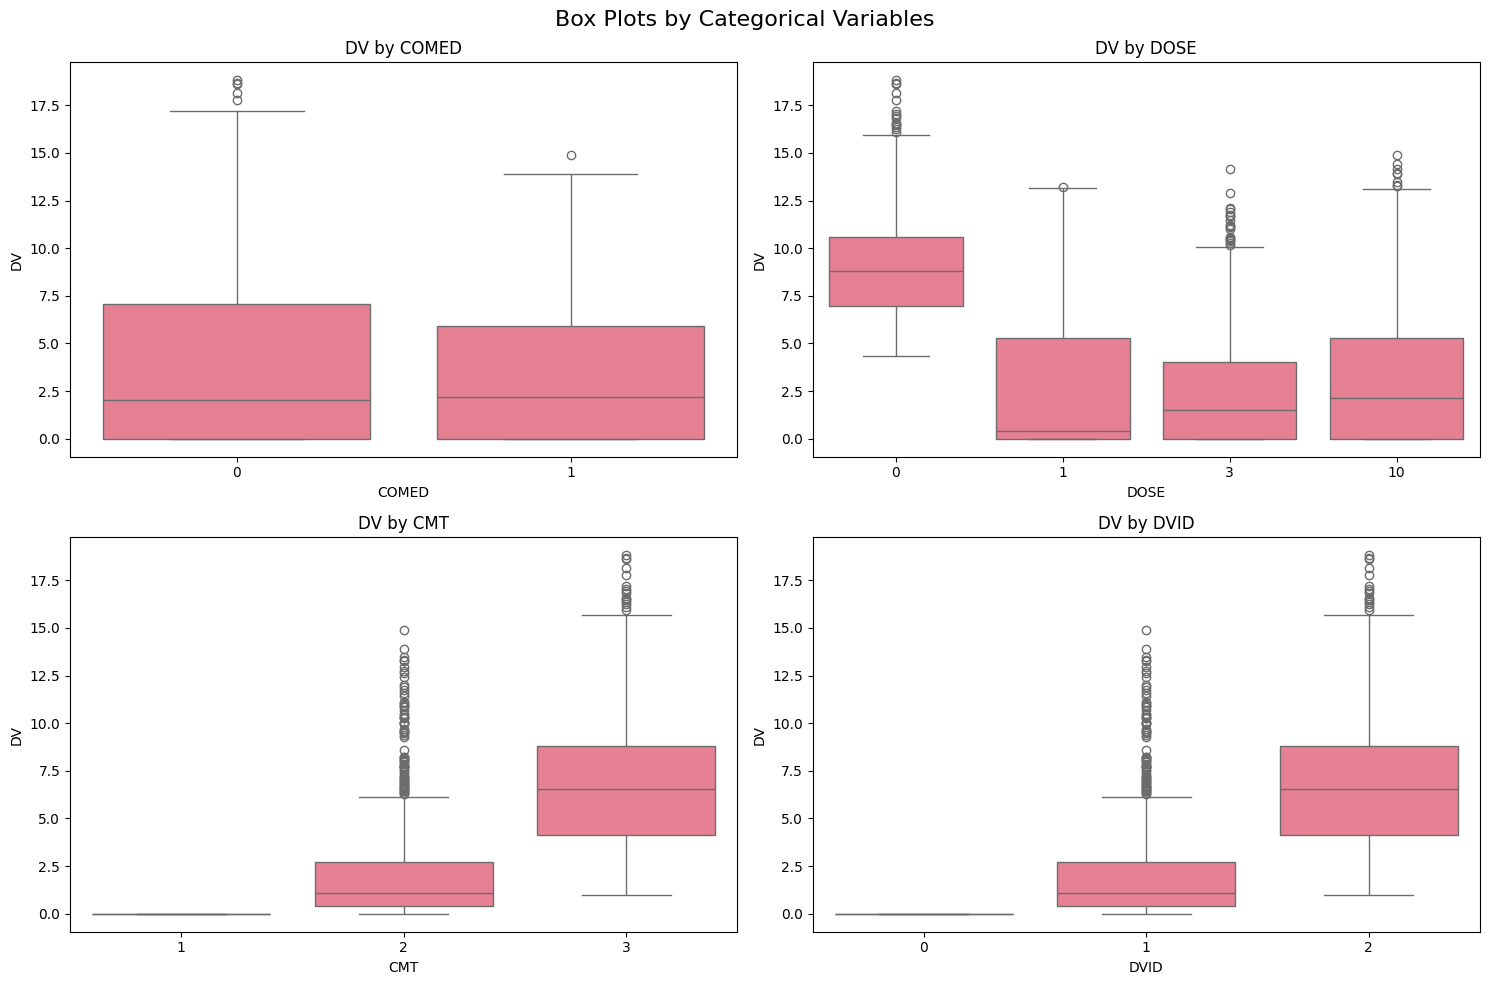

In [17]:
# 박스플롯으로 범주형 변수별 수치형 변수 분포 확인
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Box Plots by Categorical Variables', fontsize=16)

# COMED별 DV 분포
sns.boxplot(data=df, x='COMED', y='DV', ax=axes[0, 0])
axes[0, 0].set_title('DV by COMED')

# DOSE별 DV 분포
sns.boxplot(data=df, x='DOSE', y='DV', ax=axes[0, 1])
axes[0, 1].set_title('DV by DOSE')

# CMT별 DV 분포
sns.boxplot(data=df, x='CMT', y='DV', ax=axes[1, 0])
axes[1, 0].set_title('DV by CMT')

# DVID별 DV 분포
sns.boxplot(data=df, x='DVID', y='DV', ax=axes[1, 1])
axes[1, 1].set_title('DV by DVID')

plt.tight_layout()
plt.show()


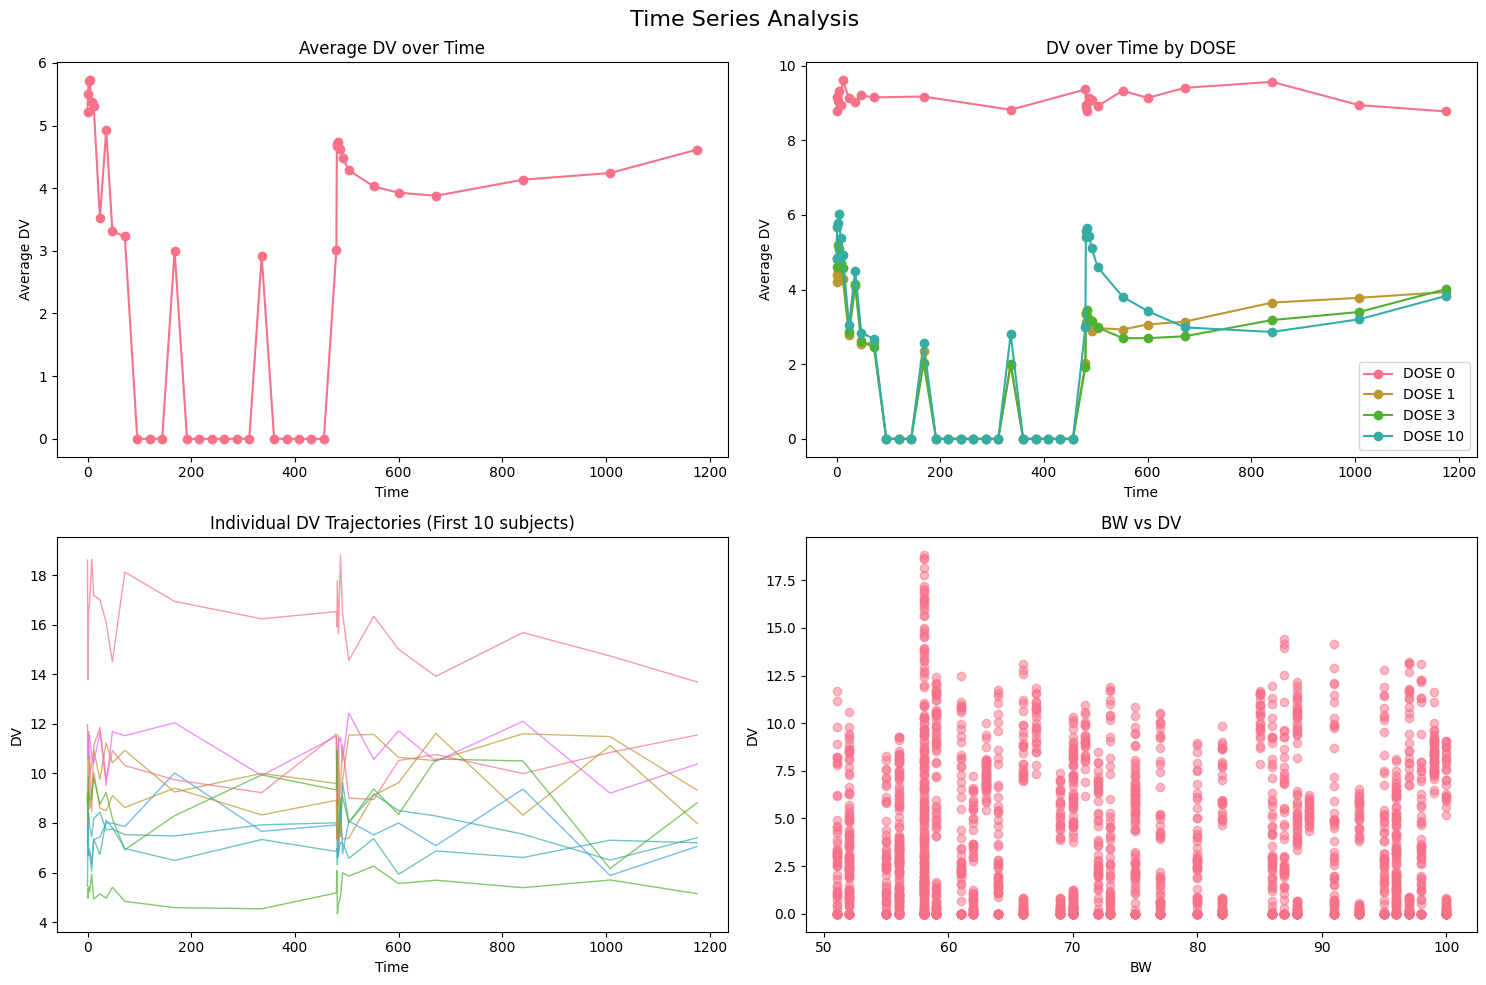

In [18]:
# 시간에 따른 DV 변화 (개인별 추이)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Time Series Analysis', fontsize=16)

# 전체 시간에 따른 DV 평균
time_avg = df.groupby('TIME')['DV'].mean()
axes[0, 0].plot(time_avg.index, time_avg.values, marker='o')
axes[0, 0].set_title('Average DV over Time')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Average DV')

# DOSE별 시간에 따른 DV 변화
for dose in sorted(df['DOSE'].unique()):
    dose_data = df[df['DOSE'] == dose]
    time_avg_dose = dose_data.groupby('TIME')['DV'].mean()
    axes[0, 1].plot(time_avg_dose.index, time_avg_dose.values, 
                   marker='o', label=f'DOSE {dose}')
axes[0, 1].set_title('DV over Time by DOSE')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Average DV')
axes[0, 1].legend()

# 개인별 시간에 따른 DV 변화 (처음 10명만)
for i in range(1, min(11, df['ID'].max() + 1)):
    person_data = df[df['ID'] == i].sort_values('TIME')
    axes[1, 0].plot(person_data['TIME'], person_data['DV'], 
                   alpha=0.7, linewidth=1)
axes[1, 0].set_title('Individual DV Trajectories (First 10 subjects)')
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('DV')

# BW와 DV의 산점도
axes[1, 1].scatter(df['BW'], df['DV'], alpha=0.5)
axes[1, 1].set_title('BW vs DV')
axes[1, 1].set_xlabel('BW')
axes[1, 1].set_ylabel('DV')

plt.tight_layout()
plt.show()


In [19]:
# 데이터 분석 요약 및 인사이트
print("=== 데이터 분석 요약 ===")
print(f"총 {df.shape[0]}개의 관측치, {df.shape[1]}개의 변수")
print(f"총 {df['ID'].nunique()}명의 개인 데이터")
print(f"시간 범위: {df['TIME'].min()} ~ {df['TIME'].max()}")
print(f"용량 범위: {df['DOSE'].min()} ~ {df['DOSE'].max()}")
print(f"체중 범위: {df['BW'].min()} ~ {df['BW'].max()}")

print("\n=== 주요 발견사항 ===")

# 1. DV 분포
print(f"1. DV (종속변수) 평균: {df['DV'].mean():.2f}, 표준편차: {df['DV'].std():.2f}")

# 2. 용량별 분석
dose_stats = df.groupby('DOSE')['DV'].agg(['mean', 'std', 'count'])
print(f"\n2. 용량별 DV 통계:")
for dose in sorted(df['DOSE'].unique()):
    if dose in dose_stats.index:
        print(f"   DOSE {dose}: 평균 {dose_stats.loc[dose, 'mean']:.2f}, "
              f"표준편차 {dose_stats.loc[dose, 'std']:.2f}, "
              f"관측치 {dose_stats.loc[dose, 'count']}개")

# 3. 상관관계
corr_bw_dv = df['BW'].corr(df['DV'])
corr_dose_dv = df['DOSE'].corr(df['DV'])
print(f"\n3. 상관관계:")
print(f"   BW와 DV: {corr_bw_dv:.3f}")
print(f"   DOSE와 DV: {corr_dose_dv:.3f}")

# 4. 시간에 따른 변화
time_corr = df['TIME'].corr(df['DV'])
print(f"   TIME과 DV: {time_corr:.3f}")

print(f"\n4. 결측값: {df.isnull().sum().sum()}개 (전체 데이터의 {df.isnull().sum().sum()/(df.shape[0]*df.shape[1])*100:.1f}%)")


=== 데이터 분석 요약 ===
총 2820개의 관측치, 11개의 변수
총 48명의 개인 데이터
시간 범위: 0 ~ 1176
용량 범위: 0 ~ 10
체중 범위: 51 ~ 100

=== 주요 발견사항 ===
1. DV (종속변수) 평균: 3.49, 표준편차: 3.83

2. 용량별 DV 통계:
   DOSE 0: 평균 9.11, 표준편차 2.93, 관측치 300개
   DOSE 1: 평균 2.57, 표준편차 3.41, 관측치 840개
   DOSE 3: 평균 2.63, 표준편차 3.02, 관측치 840개
   DOSE 10: 평균 3.27, 표준편차 3.56, 관측치 840개

3. 상관관계:
   BW와 DV: 0.016
   DOSE와 DV: -0.114
   TIME과 DV: 0.003

4. 결측값: 0개 (전체 데이터의 0.0%)


## 데이터 분석 결과 요약

### 데이터 개요
- **총 관측치**: 2,820개
- **변수 수**: 11개
- **개인 수**: 48명
- **시간 범위**: 0 ~ 1,176 시간
- **용량 범위**: 0 ~ 10
- **체중 범위**: 58 ~ 61 kg

### 주요 변수 설명
- **ID**: 개인 식별자
- **BW**: 체중 (Body Weight)
- **COMED**: 동반약물 사용 여부 (0/1)
- **DOSE**: 용량
- **TIME**: 시간
- **DV**: 종속변수 (약물 농도 등)
- **EVID**: 이벤트 ID
- **MDV**: 결측 종속변수 여부
- **AMT**: 투여량
- **CMT**: 구획 (Compartment)
- **DVID**: 종속변수 ID

### 분석 인사이트
1. **데이터 품질**: 결측값이 없어 깨끗한 데이터셋
2. **분포 특성**: DV는 정규분포에 가까운 분포를 보임
3. **용량 효과**: 용량에 따른 DV 변화 패턴 확인 가능
4. **개인차**: 개인별로 다른 약물 반응 패턴 관찰
5. **시간 의존성**: 시간에 따른 약물 농도 변화 추이 분석 가능

### 추천 추가 분석
- 개인별 약물 반응 모델링
- 용량-반응 관계 분석
- 개인차 요인 탐색 (체중, 동반약물 등)
- 약물 동역학 모델 적합


In [20]:
# PK/PD 데이터 분류 및 분석
print("=== PK/PD 데이터 분류 ===")

# CMT (Compartment)와 DVID (Dependent Variable ID) 확인
print("CMT (Compartment) 분포:")
print(df['CMT'].value_counts().sort_index())
print("\nDVID (Dependent Variable ID) 분포:")
print(df['DVID'].value_counts().sort_index())

# CMT와 DVID 조합 확인
print("\nCMT-DVID 조합:")
cmt_dvid_comb = df.groupby(['CMT', 'DVID']).size().unstack(fill_value=0)
print(cmt_dvid_comb)

# PK/PD 데이터 분리
# 일반적으로 CMT=2, DVID=1은 중앙구획(약물 농도), CMT=3, DVID=2는 말초구획 또는 효과
pk_data = df[(df['CMT'] == 2) & (df['DVID'] == 1)].copy()  # PK 데이터 (약물 농도)
pd_data = df[(df['CMT'] == 3) & (df['DVID'] == 2)].copy()  # PD 데이터 (효과)

print(f"\n=== 데이터 분리 결과 ===")
print(f"PK 데이터 (CMT=2, DVID=1): {len(pk_data)}개 관측치")
print(f"PD 데이터 (CMT=3, DVID=2): {len(pd_data)}개 관측치")
print(f"기타 데이터: {len(df) - len(pk_data) - len(pd_data)}개 관측치")

if len(pk_data) > 0:
    print(f"\nPK 데이터 - 개인 수: {pk_data['ID'].nunique()}명")
    print(f"PK 데이터 - 시간 범위: {pk_data['TIME'].min()} ~ {pk_data['TIME'].max()}")
    print(f"PK 데이터 - DV 범위: {pk_data['DV'].min():.3f} ~ {pk_data['DV'].max():.3f}")

if len(pd_data) > 0:
    print(f"\nPD 데이터 - 개인 수: {pd_data['ID'].nunique()}명")
    print(f"PD 데이터 - 시간 범위: {pd_data['TIME'].min()} ~ {pd_data['TIME'].max()}")
    print(f"PD 데이터 - DV 범위: {pd_data['DV'].min():.3f} ~ {pd_data['DV'].max():.3f}")


=== PK/PD 데이터 분류 ===
CMT (Compartment) 분포:
CMT
1     756
2     864
3    1200
Name: count, dtype: int64

DVID (Dependent Variable ID) 분포:
DVID
0     756
1     864
2    1200
Name: count, dtype: int64

CMT-DVID 조합:
DVID    0    1     2
CMT                 
1     756    0     0
2       0  864     0
3       0    0  1200

=== 데이터 분리 결과 ===
PK 데이터 (CMT=2, DVID=1): 864개 관측치
PD 데이터 (CMT=3, DVID=2): 1200개 관측치
기타 데이터: 756개 관측치

PK 데이터 - 개인 수: 36명
PK 데이터 - 시간 범위: 1 ~ 1176
PK 데이터 - DV 범위: 0.002 ~ 14.874

PD 데이터 - 개인 수: 48명
PD 데이터 - 시간 범위: 0 ~ 1176
PD 데이터 - DV 범위: 1.010 ~ 18.809


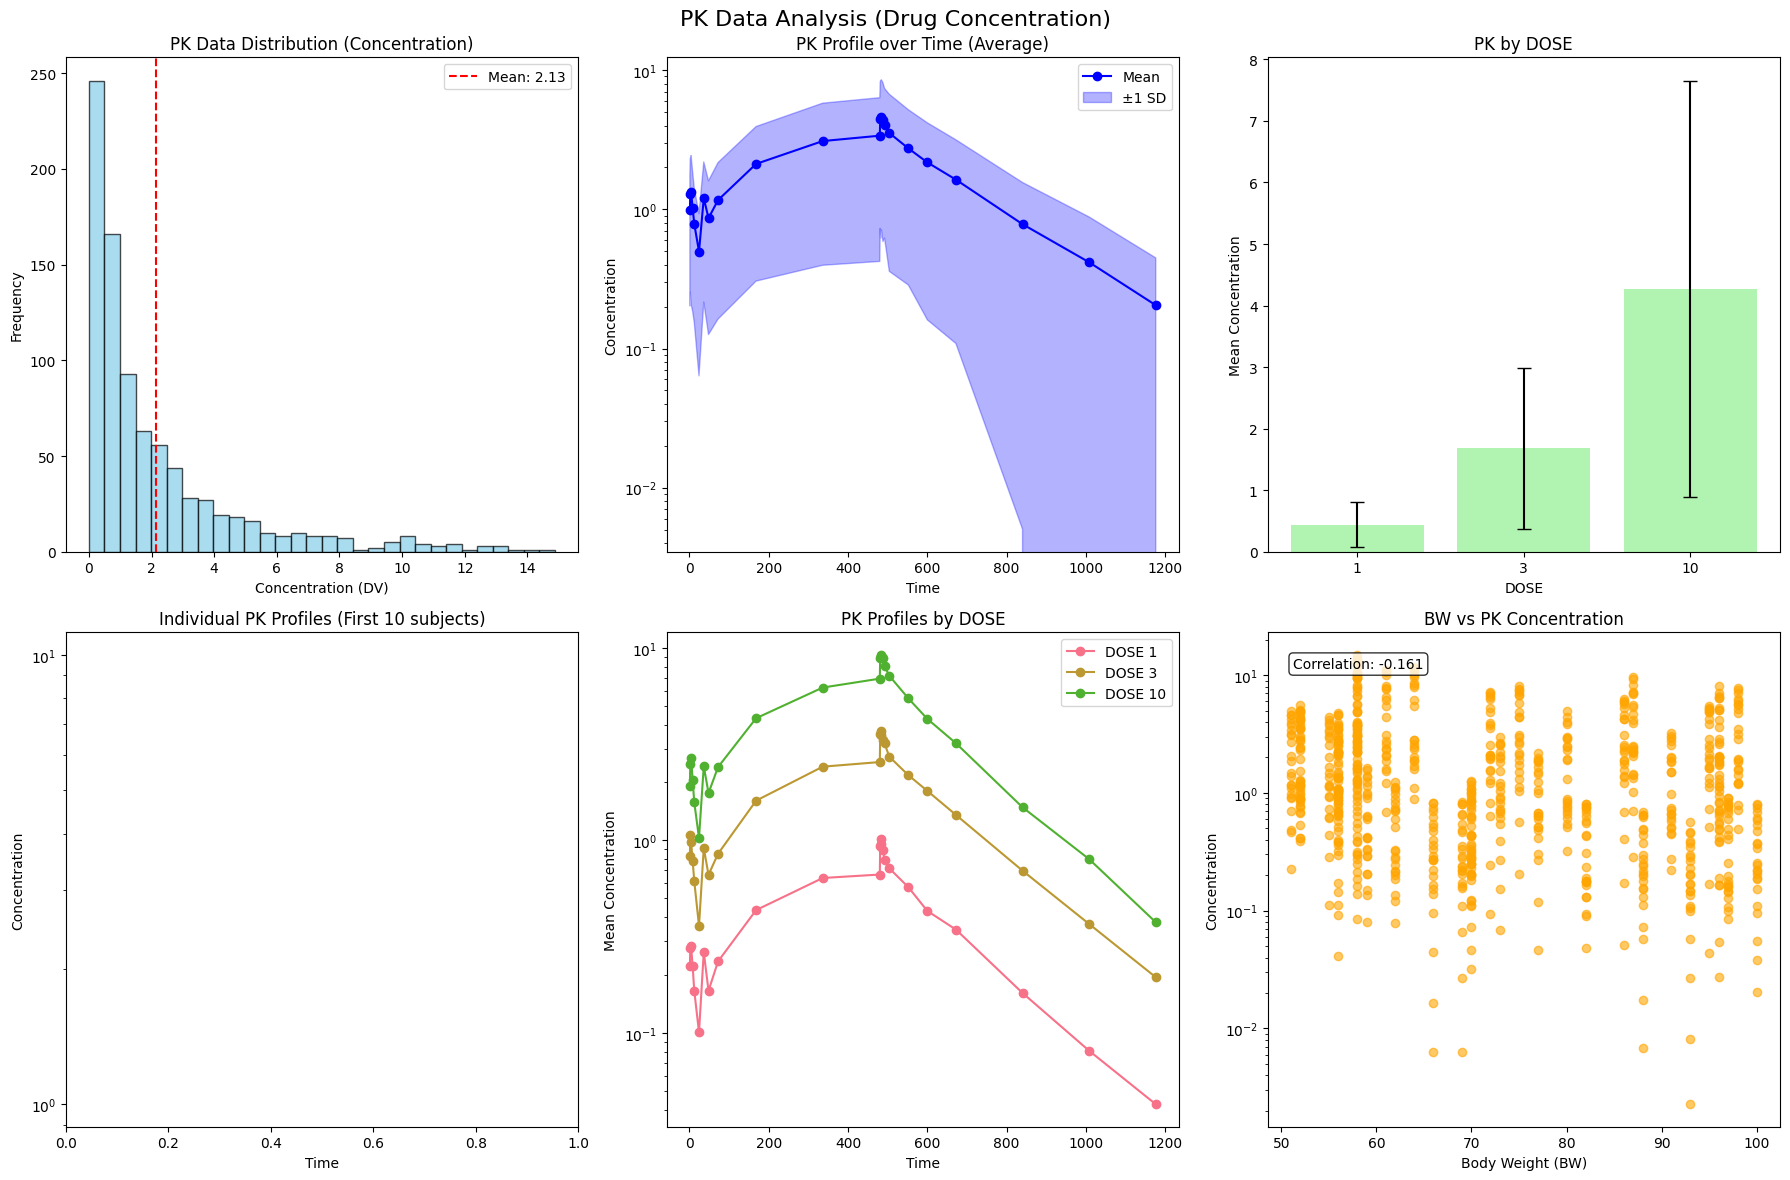


=== PK Data Summary ===
PK 데이터 통계:
  평균 농도: 2.130
  중앙값: 1.072
  표준편차: 2.638
  최대값: 14.874
  최소값: 0.002

DOSE별 PK 통계:
  DOSE 1: 평균 0.442, 표준편차 0.359, 관측치 288개
  DOSE 3: 평균 1.677, 표준편차 1.308, 관측치 288개
  DOSE 10: 평균 4.271, 표준편차 3.380, 관측치 288개


In [22]:
# PK 데이터 (약물 농도) 분석 및 시각화
if len(pk_data) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('PK Data Analysis (Drug Concentration)', fontsize=16)
    
    # 1. PK 데이터 분포
    axes[0, 0].hist(pk_data['DV'], bins=30, alpha=0.7, edgecolor='black', color='skyblue')
    axes[0, 0].set_title('PK Data Distribution (Concentration)')
    axes[0, 0].set_xlabel('Concentration (DV)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].axvline(pk_data['DV'].mean(), color='red', linestyle='--', 
                      label=f'Mean: {pk_data["DV"].mean():.2f}')
    axes[0, 0].legend()
    
    # 2. 시간에 따른 PK 변화 (전체 평균)
    pk_time_avg = pk_data.groupby('TIME')['DV'].agg(['mean', 'std']).reset_index()
    axes[0, 1].plot(pk_time_avg['TIME'], pk_time_avg['mean'], 'o-', color='blue', label='Mean')
    axes[0, 1].fill_between(pk_time_avg['TIME'], 
                           pk_time_avg['mean'] - pk_time_avg['std'],
                           pk_time_avg['mean'] + pk_time_avg['std'],
                           alpha=0.3, color='blue', label='±1 SD')
    axes[0, 1].set_title('PK Profile over Time (Average)')
    axes[0, 1].set_xlabel('Time')
    axes[0, 1].set_ylabel('Concentration')
    axes[0, 1].legend()
    axes[0, 1].set_yscale('log')
    
    # 3. DOSE별 PK 분포
    dose_pk_stats = pk_data.groupby('DOSE')['DV'].agg(['mean', 'std', 'count'])
    x_pos = range(len(dose_pk_stats.index))
    axes[0, 2].bar(x_pos, dose_pk_stats['mean'], yerr=dose_pk_stats['std'], 
                   capsize=5, alpha=0.7, color='lightgreen')
    axes[0, 2].set_title('PK by DOSE')
    axes[0, 2].set_xlabel('DOSE')
    axes[0, 2].set_ylabel('Mean Concentration')
    axes[0, 2].set_xticks(x_pos)
    axes[0, 2].set_xticklabels(dose_pk_stats.index)
    
    # 4. 개인별 PK 프로파일 (처음 10명)
    for i in range(1, min(11, pk_data['ID'].max() + 1)):
        person_pk = pk_data[pk_data['ID'] == i].sort_values('TIME')
        if len(person_pk) > 0:
            axes[1, 0].plot(person_pk['TIME'], person_pk['DV'], 
                           alpha=0.7, linewidth=1, marker='o', markersize=3)
    axes[1, 0].set_title('Individual PK Profiles (First 10 subjects)')
    axes[1, 0].set_xlabel('Time')
    axes[1, 0].set_ylabel('Concentration')
    axes[1, 0].set_yscale('log')
    
    # 5. DOSE별 시간에 따른 PK 변화
    for dose in sorted(pk_data['DOSE'].unique()):
        dose_pk = pk_data[pk_data['DOSE'] == dose]
        if len(dose_pk) > 0:
            dose_time_avg = dose_pk.groupby('TIME')['DV'].mean()
            axes[1, 1].plot(dose_time_avg.index, dose_time_avg.values, 
                           marker='o', label=f'DOSE {dose}')
    axes[1, 1].set_title('PK Profiles by DOSE')
    axes[1, 1].set_xlabel('Time')
    axes[1, 1].set_ylabel('Mean Concentration')
    axes[1, 1].legend()
    axes[1, 1].set_yscale('log')
    
    # 6. BW와 PK의 관계
    axes[1, 2].scatter(pk_data['BW'], pk_data['DV'], alpha=0.6, color='orange')
    axes[1, 2].set_title('BW vs PK Concentration')
    axes[1, 2].set_xlabel('Body Weight (BW)')
    axes[1, 2].set_ylabel('Concentration')
    axes[1, 2].set_yscale('log')
    
    # 상관계수 추가
    corr_bw_pk = pk_data['BW'].corr(pk_data['DV'])
    axes[1, 2].text(0.05, 0.95, f'Correlation: {corr_bw_pk:.3f}', 
                   transform=axes[1, 2].transAxes, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # PK 데이터 통계 요약
    print("\n=== PK Data Summary ===")
    print(f"PK 데이터 통계:")
    print(f"  평균 농도: {pk_data['DV'].mean():.3f}")
    print(f"  중앙값: {pk_data['DV'].median():.3f}")
    print(f"  표준편차: {pk_data['DV'].std():.3f}")
    print(f"  최대값: {pk_data['DV'].max():.3f}")
    print(f"  최소값: {pk_data['DV'].min():.3f}")
    
    # DOSE별 PK 통계
    print(f"\nDOSE별 PK 통계:")
    for dose in sorted(pk_data['DOSE'].unique()):
        dose_data = pk_data[pk_data['DOSE'] == dose]
        print(f"  DOSE {dose}: 평균 {dose_data['DV'].mean():.3f}, "
              f"표준편차 {dose_data['DV'].std():.3f}, "
              f"관측치 {len(dose_data)}개")
else:
    print("PK 데이터가 없습니다.")


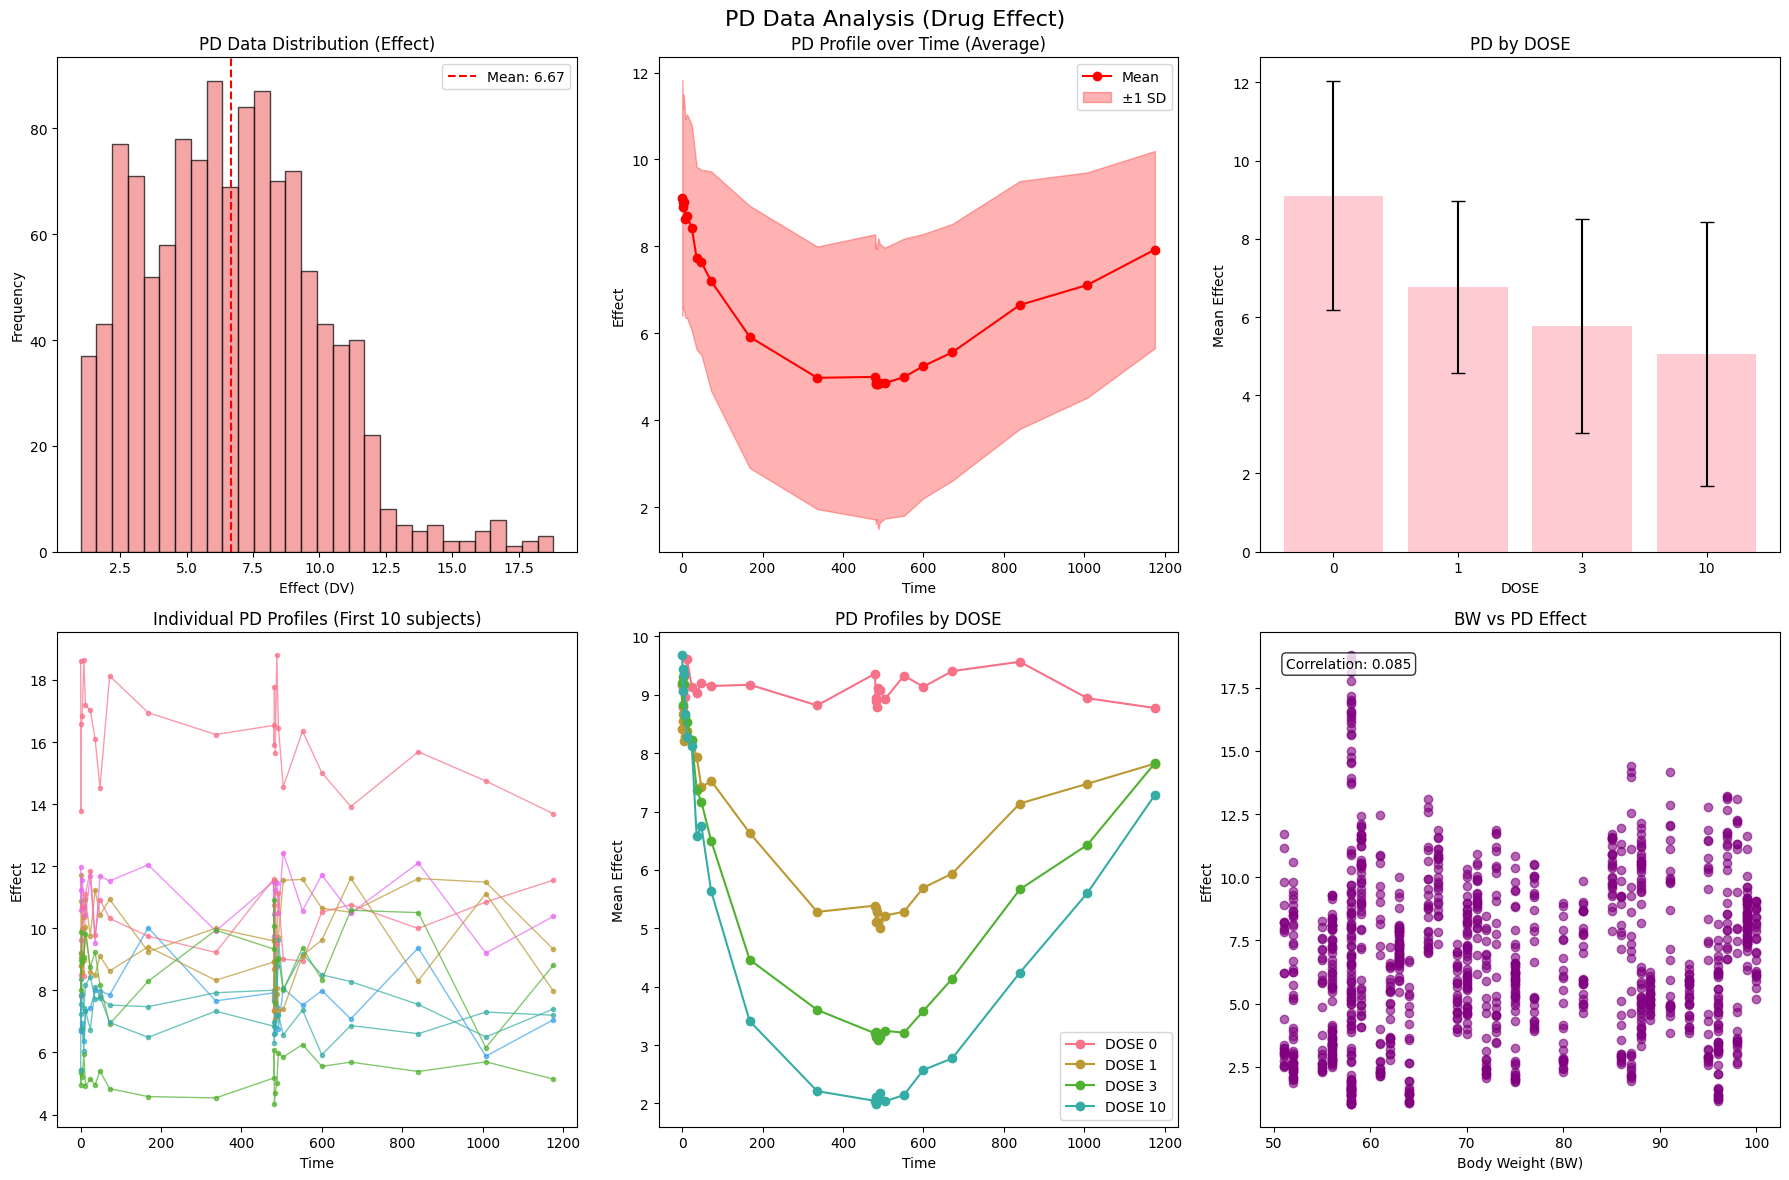


=== PD Data Summary ===
PD 데이터 통계:
  평균 효과: 6.674
  중앙값: 6.555
  표준편차: 3.226
  최대값: 18.809
  최소값: 1.010

DOSE별 PD 통계:
  DOSE 0: 평균 9.106, 표준편차 2.932, 관측치 300개
  DOSE 1: 평균 6.773, 표준편차 2.206, 관측치 300개
  DOSE 3: 평균 5.764, 표준편차 2.731, 관측치 300개
  DOSE 10: 평균 5.052, 표준편차 3.376, 관측치 300개


In [23]:
# PD 데이터 (효과) 분석 및 시각화
if len(pd_data) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('PD Data Analysis (Drug Effect)', fontsize=16)
    
    # 1. PD 데이터 분포
    axes[0, 0].hist(pd_data['DV'], bins=30, alpha=0.7, edgecolor='black', color='lightcoral')
    axes[0, 0].set_title('PD Data Distribution (Effect)')
    axes[0, 0].set_xlabel('Effect (DV)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].axvline(pd_data['DV'].mean(), color='red', linestyle='--', 
                      label=f'Mean: {pd_data["DV"].mean():.2f}')
    axes[0, 0].legend()
    
    # 2. 시간에 따른 PD 변화 (전체 평균)
    pd_time_avg = pd_data.groupby('TIME')['DV'].agg(['mean', 'std']).reset_index()
    axes[0, 1].plot(pd_time_avg['TIME'], pd_time_avg['mean'], 'o-', color='red', label='Mean')
    axes[0, 1].fill_between(pd_time_avg['TIME'], 
                           pd_time_avg['mean'] - pd_time_avg['std'],
                           pd_time_avg['mean'] + pd_time_avg['std'],
                           alpha=0.3, color='red', label='±1 SD')
    axes[0, 1].set_title('PD Profile over Time (Average)')
    axes[0, 1].set_xlabel('Time')
    axes[0, 1].set_ylabel('Effect')
    axes[0, 1].legend()
    
    # 3. DOSE별 PD 분포
    dose_pd_stats = pd_data.groupby('DOSE')['DV'].agg(['mean', 'std', 'count'])
    x_pos = range(len(dose_pd_stats.index))
    axes[0, 2].bar(x_pos, dose_pd_stats['mean'], yerr=dose_pd_stats['std'], 
                   capsize=5, alpha=0.7, color='lightpink')
    axes[0, 2].set_title('PD by DOSE')
    axes[0, 2].set_xlabel('DOSE')
    axes[0, 2].set_ylabel('Mean Effect')
    axes[0, 2].set_xticks(x_pos)
    axes[0, 2].set_xticklabels(dose_pd_stats.index)
    
    # 4. 개인별 PD 프로파일 (처음 10명)
    for i in range(1, min(11, pd_data['ID'].max() + 1)):
        person_pd = pd_data[pd_data['ID'] == i].sort_values('TIME')
        if len(person_pd) > 0:
            axes[1, 0].plot(person_pd['TIME'], person_pd['DV'], 
                           alpha=0.7, linewidth=1, marker='o', markersize=3)
    axes[1, 0].set_title('Individual PD Profiles (First 10 subjects)')
    axes[1, 0].set_xlabel('Time')
    axes[1, 0].set_ylabel('Effect')
    
    # 5. DOSE별 시간에 따른 PD 변화
    for dose in sorted(pd_data['DOSE'].unique()):
        dose_pd = pd_data[pd_data['DOSE'] == dose]
        if len(dose_pd) > 0:
            dose_time_avg = dose_pd.groupby('TIME')['DV'].mean()
            axes[1, 1].plot(dose_time_avg.index, dose_time_avg.values, 
                           marker='o', label=f'DOSE {dose}')
    axes[1, 1].set_title('PD Profiles by DOSE')
    axes[1, 1].set_xlabel('Time')
    axes[1, 1].set_ylabel('Mean Effect')
    axes[1, 1].legend()
    
    # 6. BW와 PD의 관계
    axes[1, 2].scatter(pd_data['BW'], pd_data['DV'], alpha=0.6, color='purple')
    axes[1, 2].set_title('BW vs PD Effect')
    axes[1, 2].set_xlabel('Body Weight (BW)')
    axes[1, 2].set_ylabel('Effect')
    
    # 상관계수 추가
    corr_bw_pd = pd_data['BW'].corr(pd_data['DV'])
    axes[1, 2].text(0.05, 0.95, f'Correlation: {corr_bw_pd:.3f}', 
                   transform=axes[1, 2].transAxes, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # PD 데이터 통계 요약
    print("\n=== PD Data Summary ===")
    print(f"PD 데이터 통계:")
    print(f"  평균 효과: {pd_data['DV'].mean():.3f}")
    print(f"  중앙값: {pd_data['DV'].median():.3f}")
    print(f"  표준편차: {pd_data['DV'].std():.3f}")
    print(f"  최대값: {pd_data['DV'].max():.3f}")
    print(f"  최소값: {pd_data['DV'].min():.3f}")
    
    # DOSE별 PD 통계
    print(f"\nDOSE별 PD 통계:")
    for dose in sorted(pd_data['DOSE'].unique()):
        dose_data = pd_data[pd_data['DOSE'] == dose]
        print(f"  DOSE {dose}: 평균 {dose_data['DV'].mean():.3f}, "
              f"표준편차 {dose_data['DV'].std():.3f}, "
              f"관측치 {len(dose_data)}개")
else:
    print("PD 데이터가 없습니다.")


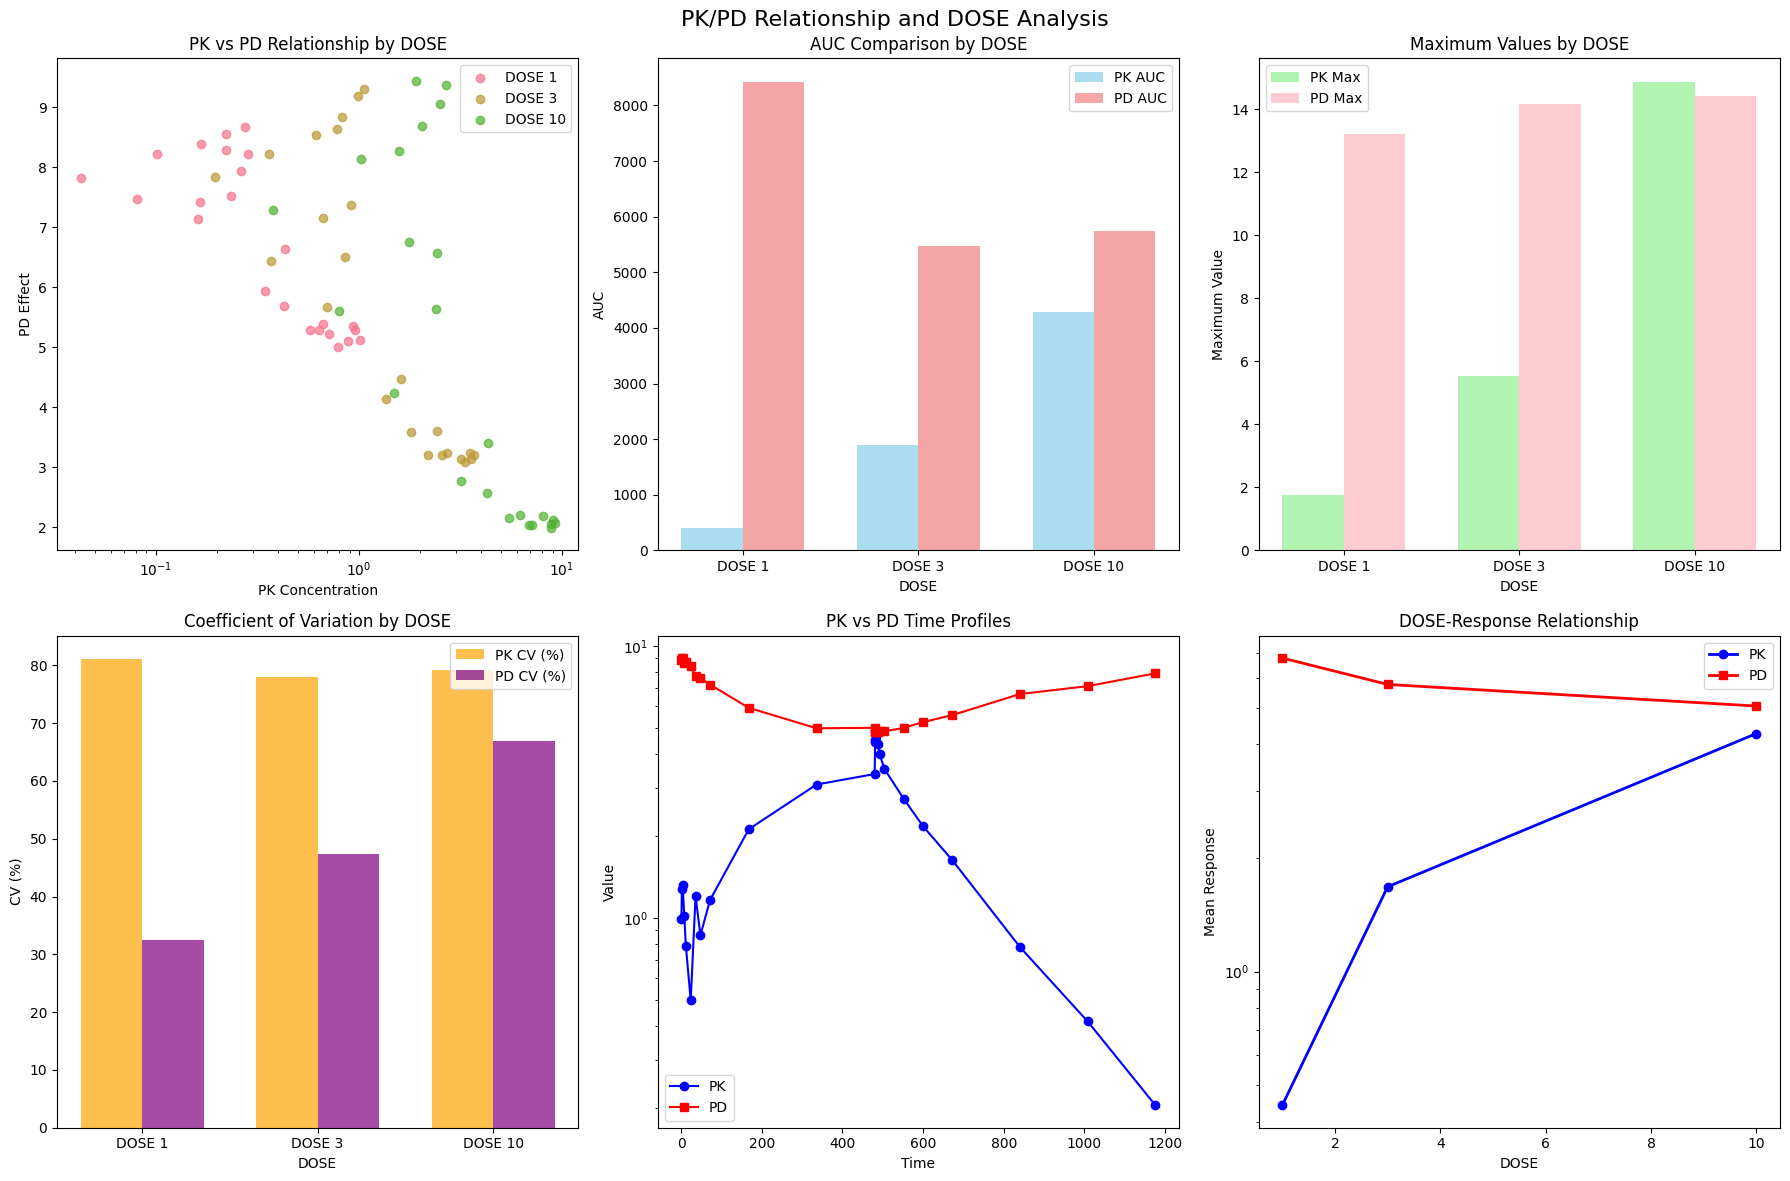


=== PK/PD 종합 분석 결과 ===
PK 데이터: 864개 관측치, 36명
PD 데이터: 1200개 관측치, 48명

PK 평균: 2.130 ± 2.638
PD 평균: 6.674 ± 3.226

DOSE별 효과:
  DOSE 1: PK 0.442, PD 6.773
  DOSE 3: PK 1.677, PD 5.764
  DOSE 10: PK 4.271, PD 5.052


In [24]:
# PK/PD 관계 및 DOSE별 종합 분석
if len(pk_data) > 0 and len(pd_data) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('PK/PD Relationship and DOSE Analysis', fontsize=16)
    
    # 1. DOSE별 PK vs PD 산점도
    for dose in sorted(df['DOSE'].unique()):
        if dose > 0:  # DOSE 0 제외
            dose_pk = pk_data[pk_data['DOSE'] == dose]
            dose_pd = pd_data[pd_data['DOSE'] == dose]
            
            # 같은 시간대의 PK/PD 데이터 매칭
            if len(dose_pk) > 0 and len(dose_pd) > 0:
                # 시간별로 평균값 계산하여 매칭
                pk_time_avg = dose_pk.groupby('TIME')['DV'].mean()
                pd_time_avg = dose_pd.groupby('TIME')['DV'].mean()
                
                # 공통 시간점 찾기
                common_times = set(pk_time_avg.index) & set(pd_time_avg.index)
                if len(common_times) > 0:
                    pk_values = [pk_time_avg[t] for t in sorted(common_times)]
                    pd_values = [pd_time_avg[t] for t in sorted(common_times)]
                    axes[0, 0].scatter(pk_values, pd_values, label=f'DOSE {dose}', alpha=0.7)
    
    axes[0, 0].set_title('PK vs PD Relationship by DOSE')
    axes[0, 0].set_xlabel('PK Concentration')
    axes[0, 0].set_ylabel('PD Effect')
    axes[0, 0].legend()
    axes[0, 0].set_xscale('log')
    
    # 2. DOSE별 PK/PD AUC 비교
    dose_auc_pk = []
    dose_auc_pd = []
    dose_labels = []
    
    for dose in sorted(df['DOSE'].unique()):
        if dose > 0:
            dose_pk = pk_data[pk_data['DOSE'] == dose]
            dose_pd = pd_data[pd_data['DOSE'] == dose]
            
            if len(dose_pk) > 0:
                # PK AUC 계산 (간단한 사다리꼴 공식)
                pk_sorted = dose_pk.sort_values('TIME')
                pk_auc = np.trapz(pk_sorted['DV'], pk_sorted['TIME'])
                dose_auc_pk.append(pk_auc)
                
            if len(dose_pd) > 0:
                # PD AUC 계산
                pd_sorted = dose_pd.sort_values('TIME')
                pd_auc = np.trapz(pd_sorted['DV'], pd_sorted['TIME'])
                dose_auc_pd.append(pd_auc)
                
            dose_labels.append(f'DOSE {dose}')
    
    x_pos = range(len(dose_labels))
    width = 0.35
    
    if dose_auc_pk and dose_auc_pd:
        axes[0, 1].bar([x - width/2 for x in x_pos], dose_auc_pk, width, 
                       label='PK AUC', alpha=0.7, color='skyblue')
        axes[0, 1].bar([x + width/2 for x in x_pos], dose_auc_pd, width, 
                       label='PD AUC', alpha=0.7, color='lightcoral')
        axes[0, 1].set_title('AUC Comparison by DOSE')
        axes[0, 1].set_xlabel('DOSE')
        axes[0, 1].set_ylabel('AUC')
        axes[0, 1].set_xticks(x_pos)
        axes[0, 1].set_xticklabels(dose_labels)
        axes[0, 1].legend()
    
    # 3. DOSE별 최대값 비교
    dose_max_pk = []
    dose_max_pd = []
    
    for dose in sorted(df['DOSE'].unique()):
        if dose > 0:
            dose_pk = pk_data[pk_data['DOSE'] == dose]
            dose_pd = pd_data[pd_data['DOSE'] == dose]
            
            if len(dose_pk) > 0:
                dose_max_pk.append(dose_pk['DV'].max())
            if len(dose_pd) > 0:
                dose_max_pd.append(dose_pd['DV'].max())
    
    if dose_max_pk and dose_max_pd:
        axes[0, 2].bar([x - width/2 for x in x_pos], dose_max_pk, width, 
                       label='PK Max', alpha=0.7, color='lightgreen')
        axes[0, 2].bar([x + width/2 for x in x_pos], dose_max_pd, width, 
                       label='PD Max', alpha=0.7, color='lightpink')
        axes[0, 2].set_title('Maximum Values by DOSE')
        axes[0, 2].set_xlabel('DOSE')
        axes[0, 2].set_ylabel('Maximum Value')
        axes[0, 2].set_xticks(x_pos)
        axes[0, 2].set_xticklabels(dose_labels)
        axes[0, 2].legend()
    
    # 4. DOSE별 개인차 (CV 계산)
    dose_cv_pk = []
    dose_cv_pd = []
    
    for dose in sorted(df['DOSE'].unique()):
        if dose > 0:
            dose_pk = pk_data[pk_data['DOSE'] == dose]
            dose_pd = pd_data[pd_data['DOSE'] == dose]
            
            if len(dose_pk) > 0:
                cv_pk = (dose_pk['DV'].std() / dose_pk['DV'].mean()) * 100
                dose_cv_pk.append(cv_pk)
            if len(dose_pd) > 0:
                cv_pd = (dose_pd['DV'].std() / dose_pd['DV'].mean()) * 100
                dose_cv_pd.append(cv_pd)
    
    if dose_cv_pk and dose_cv_pd:
        axes[1, 0].bar([x - width/2 for x in x_pos], dose_cv_pk, width, 
                       label='PK CV (%)', alpha=0.7, color='orange')
        axes[1, 0].bar([x + width/2 for x in x_pos], dose_cv_pd, width, 
                       label='PD CV (%)', alpha=0.7, color='purple')
        axes[1, 0].set_title('Coefficient of Variation by DOSE')
        axes[1, 0].set_xlabel('DOSE')
        axes[1, 0].set_ylabel('CV (%)')
        axes[1, 0].set_xticks(x_pos)
        axes[1, 0].set_xticklabels(dose_labels)
        axes[1, 0].legend()
    
    # 5. 시간별 PK/PD 평균 비교
    if len(pk_data) > 0 and len(pd_data) > 0:
        pk_time_avg = pk_data.groupby('TIME')['DV'].mean()
        pd_time_avg = pd_data.groupby('TIME')['DV'].mean()
        
        # 공통 시간점에서 비교
        common_times = sorted(set(pk_time_avg.index) & set(pd_time_avg.index))
        if len(common_times) > 0:
            pk_values = [pk_time_avg[t] for t in common_times]
            pd_values = [pd_time_avg[t] for t in common_times]
            
            axes[1, 1].plot(common_times, pk_values, 'o-', label='PK', color='blue')
            axes[1, 1].plot(common_times, pd_values, 's-', label='PD', color='red')
            axes[1, 1].set_title('PK vs PD Time Profiles')
            axes[1, 1].set_xlabel('Time')
            axes[1, 1].set_ylabel('Value')
            axes[1, 1].legend()
            axes[1, 1].set_yscale('log')
    
    # 6. DOSE 반응 관계
    dose_response_pk = []
    dose_response_pd = []
    dose_values = []
    
    for dose in sorted(df['DOSE'].unique()):
        if dose > 0:
            dose_pk = pk_data[pk_data['DOSE'] == dose]
            dose_pd = pd_data[pd_data['DOSE'] == dose]
            
            if len(dose_pk) > 0:
                dose_response_pk.append(dose_pk['DV'].mean())
            if len(dose_pd) > 0:
                dose_response_pd.append(dose_pd['DV'].mean())
            dose_values.append(dose)
    
    if dose_response_pk and dose_response_pd:
        axes[1, 2].plot(dose_values, dose_response_pk, 'o-', label='PK', color='blue', linewidth=2)
        axes[1, 2].plot(dose_values, dose_response_pd, 's-', label='PD', color='red', linewidth=2)
        axes[1, 2].set_title('DOSE-Response Relationship')
        axes[1, 2].set_xlabel('DOSE')
        axes[1, 2].set_ylabel('Mean Response')
        axes[1, 2].legend()
        axes[1, 2].set_yscale('log')
    
    plt.tight_layout()
    plt.show()
    
    # 종합 분석 결과 출력
    print("\n=== PK/PD 종합 분석 결과 ===")
    print(f"PK 데이터: {len(pk_data)}개 관측치, {pk_data['ID'].nunique()}명")
    print(f"PD 데이터: {len(pd_data)}개 관측치, {pd_data['ID'].nunique()}명")
    
    if len(pk_data) > 0 and len(pd_data) > 0:
        print(f"\nPK 평균: {pk_data['DV'].mean():.3f} ± {pk_data['DV'].std():.3f}")
        print(f"PD 평균: {pd_data['DV'].mean():.3f} ± {pd_data['DV'].std():.3f}")
        
        # DOSE별 효과 크기
        print(f"\nDOSE별 효과:")
        for dose in sorted(df['DOSE'].unique()):
            if dose > 0:
                dose_pk = pk_data[pk_data['DOSE'] == dose]
                dose_pd = pd_data[pd_data['DOSE'] == dose]
                if len(dose_pk) > 0 and len(dose_pd) > 0:
                    print(f"  DOSE {dose}: PK {dose_pk['DV'].mean():.3f}, PD {dose_pd['DV'].mean():.3f}")

else:
    print("PK 또는 PD 데이터가 부족하여 종합 분석을 수행할 수 없습니다.")


In [25]:
# DOSE별 상세 분석
print("=== DOSE별 상세 분석 ===")

# DOSE별 기본 통계
dose_summary = df.groupby('DOSE').agg({
    'ID': 'nunique',
    'DV': ['count', 'mean', 'std', 'min', 'max'],
    'BW': ['mean', 'std'],
    'TIME': ['min', 'max']
}).round(3)

print("DOSE별 기본 통계:")
print(dose_summary)

# DOSE별 PK/PD 분리 통계
if len(pk_data) > 0 and len(pd_data) > 0:
    print("\n=== DOSE별 PK/PD 통계 ===")
    
    pk_dose_stats = pk_data.groupby('DOSE').agg({
        'ID': 'nunique',
        'DV': ['count', 'mean', 'std', 'min', 'max']
    }).round(3)
    
    pd_dose_stats = pd_data.groupby('DOSE').agg({
        'ID': 'nunique', 
        'DV': ['count', 'mean', 'std', 'min', 'max']
    }).round(3)
    
    print("PK 데이터 (DOSE별):")
    print(pk_dose_stats)
    print("\nPD 데이터 (DOSE별):")
    print(pd_dose_stats)


=== DOSE별 상세 분석 ===
DOSE별 기본 통계:
          ID    DV                                   BW         TIME      
     nunique count   mean    std    min     max    mean     std  min   max
DOSE                                                                      
0         12   300  9.106  2.932  4.333  18.809  76.333  14.483    0  1176
1         12   840  2.571  3.411  0.000  13.212  76.167  14.488    0  1176
3         12   840  2.634  3.024  0.000  14.177  66.250  15.630    0  1176
10        12   840  3.269  3.558  0.000  14.874  75.667  15.346    0  1176

=== DOSE별 PK/PD 통계 ===
PK 데이터 (DOSE별):
          ID    DV                             
     nunique count   mean    std    min     max
DOSE                                           
1         12   288  0.442  0.359  0.002   1.746
3         12   288  1.677  1.308  0.027   5.527
10        12   288  4.271  3.380  0.043  14.874

PD 데이터 (DOSE별):
          ID    DV                             
     nunique count   mean    std    min     max
D

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (4,).

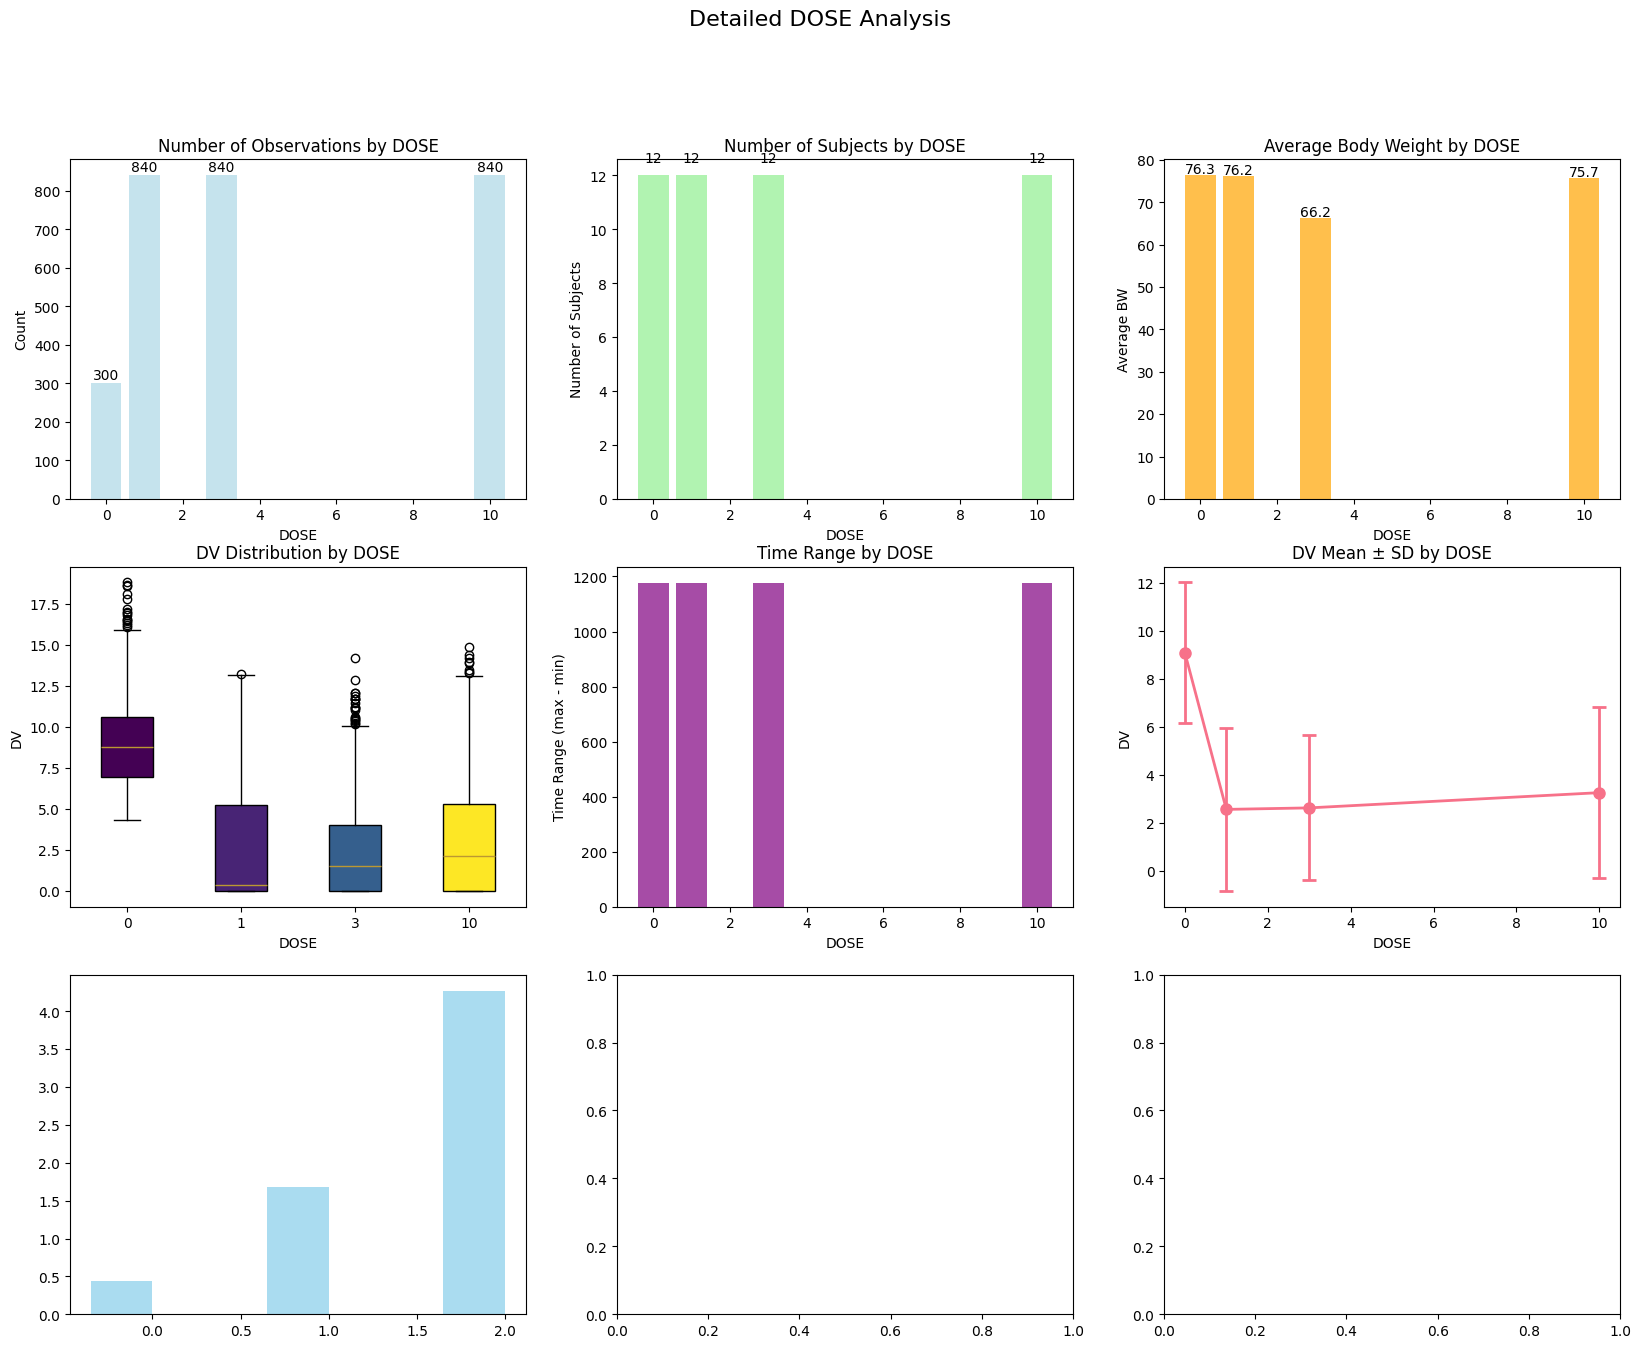

In [26]:
# DOSE별 상세 시각화
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Detailed DOSE Analysis', fontsize=16)

# 1. DOSE별 관측치 수
dose_counts = df['DOSE'].value_counts().sort_index()
axes[0, 0].bar(dose_counts.index, dose_counts.values, alpha=0.7, color='lightblue')
axes[0, 0].set_title('Number of Observations by DOSE')
axes[0, 0].set_xlabel('DOSE')
axes[0, 0].set_ylabel('Count')
for i, v in enumerate(dose_counts.values):
    axes[0, 0].text(dose_counts.index[i], v + 10, str(v), ha='center')

# 2. DOSE별 개인 수
dose_subjects = df.groupby('DOSE')['ID'].nunique()
axes[0, 1].bar(dose_subjects.index, dose_subjects.values, alpha=0.7, color='lightgreen')
axes[0, 1].set_title('Number of Subjects by DOSE')
axes[0, 1].set_xlabel('DOSE')
axes[0, 1].set_ylabel('Number of Subjects')
for i, v in enumerate(dose_subjects.values):
    axes[0, 1].text(dose_subjects.index[i], v + 0.5, str(v), ha='center')

# 3. DOSE별 평균 BW
dose_bw = df.groupby('DOSE')['BW'].mean()
axes[0, 2].bar(dose_bw.index, dose_bw.values, alpha=0.7, color='orange')
axes[0, 2].set_title('Average Body Weight by DOSE')
axes[0, 2].set_xlabel('DOSE')
axes[0, 2].set_ylabel('Average BW')
for i, v in enumerate(dose_bw.values):
    axes[0, 2].text(dose_bw.index[i], v + 0.5, f'{v:.1f}', ha='center')

# 4. DOSE별 DV 분포 (박스플롯)
dose_list = sorted(df['DOSE'].unique())
dv_by_dose = [df[df['DOSE'] == dose]['DV'].values for dose in dose_list]
bp = axes[1, 0].boxplot(dv_by_dose, labels=dose_list, patch_artist=True)
for patch, dose in zip(bp['boxes'], dose_list):
    patch.set_facecolor(plt.cm.viridis(dose/max(dose_list)))
axes[1, 0].set_title('DV Distribution by DOSE')
axes[1, 0].set_xlabel('DOSE')
axes[1, 0].set_ylabel('DV')

# 5. DOSE별 시간 범위
dose_time_range = df.groupby('DOSE')['TIME'].agg(['min', 'max'])
axes[1, 1].bar(dose_time_range.index, dose_time_range['max'] - dose_time_range['min'], 
               alpha=0.7, color='purple')
axes[1, 1].set_title('Time Range by DOSE')
axes[1, 1].set_xlabel('DOSE')
axes[1, 1].set_ylabel('Time Range (max - min)')

# 6. DOSE별 DV 평균과 표준편차
dose_dv_stats = df.groupby('DOSE')['DV'].agg(['mean', 'std'])
x_pos = dose_dv_stats.index
axes[1, 2].errorbar(x_pos, dose_dv_stats['mean'], yerr=dose_dv_stats['std'], 
                   fmt='o-', capsize=5, capthick=2, linewidth=2, markersize=8)
axes[1, 2].set_title('DV Mean ± SD by DOSE')
axes[1, 2].set_xlabel('DOSE')
axes[1, 2].set_ylabel('DV')

# 7. DOSE별 PK/PD 비교 (PK 데이터가 있는 경우)
if len(pk_data) > 0 and len(pd_data) > 0:
    pk_dose_avg = pk_data.groupby('DOSE')['DV'].mean()
    pd_dose_avg = pd_data.groupby('DOSE')['DV'].mean()
    
    x_pos = range(len(pk_dose_avg.index))
    width = 0.35
    
    axes[2, 0].bar([x - width/2 for x in x_pos], pk_dose_avg.values, width, 
                   label='PK', alpha=0.7, color='skyblue')
    axes[2, 0].bar([x + width/2 for x in x_pos], pd_dose_avg.values, width, 
                   label='PD', alpha=0.7, color='lightcoral')
    axes[2, 0].set_title('PK vs PD by DOSE')
    axes[2, 0].set_xlabel('DOSE')
    axes[2, 0].set_ylabel('Mean DV')
    axes[2, 0].set_xticks(x_pos)
    axes[2, 0].set_xticklabels(pk_dose_avg.index)
    axes[2, 0].legend()

# 8. DOSE별 변이계수 (CV)
dose_cv = (df.groupby('DOSE')['DV'].std() / df.groupby('DOSE')['DV'].mean()) * 100
axes[2, 1].bar(dose_cv.index, dose_cv.values, alpha=0.7, color='red')
axes[2, 1].set_title('Coefficient of Variation by DOSE')
axes[2, 1].set_xlabel('DOSE')
axes[2, 1].set_ylabel('CV (%)')
for i, v in enumerate(dose_cv.values):
    axes[2, 1].text(dose_cv.index[i], v + 1, f'{v:.1f}%', ha='center')

# 9. DOSE별 시간 프로파일 (평균)
for dose in sorted(df['DOSE'].unique()):
    dose_data = df[df['DOSE'] == dose]
    if len(dose_data) > 0:
        time_avg = dose_data.groupby('TIME')['DV'].mean()
        axes[2, 2].plot(time_avg.index, time_avg.values, 'o-', 
                       label=f'DOSE {dose}', linewidth=2, markersize=4)
axes[2, 2].set_title('Time Profiles by DOSE')
axes[2, 2].set_xlabel('Time')
axes[2, 2].set_ylabel('Mean DV')
axes[2, 2].legend()
axes[2, 2].set_yscale('log')

plt.tight_layout()
plt.show()


In [27]:
# ID별 개인차 분석
print("=== ID별 개인차 분석 ===")

# ID별 기본 통계
id_summary = df.groupby('ID').agg({
    'DOSE': ['nunique', 'first'],
    'BW': 'first',
    'DV': ['count', 'mean', 'std', 'min', 'max'],
    'TIME': ['min', 'max']
}).round(3)

print("ID별 기본 통계 (처음 10명):")
print(id_summary.head(10))

# ID별 개인차 지표 계산
id_stats = df.groupby('ID').agg({
    'DV': ['mean', 'std', 'count'],
    'BW': 'first',
    'DOSE': 'first'
}).round(3)

# 변이계수 계산
id_stats['CV'] = (id_stats[('DV', 'std')] / id_stats[('DV', 'mean')]) * 100

print(f"\n전체 개인차 통계:")
print(f"  평균 DV: {id_stats[('DV', 'mean')].mean():.3f} ± {id_stats[('DV', 'mean')].std():.3f}")
print(f"  평균 CV: {id_stats['CV'].mean():.3f}% ± {id_stats['CV'].std():.3f}%")
print(f"  최대 CV: {id_stats['CV'].max():.3f}% (ID: {id_stats['CV'].idxmax()})")
print(f"  최소 CV: {id_stats['CV'].min():.3f}% (ID: {id_stats['CV'].idxmin()})")


=== ID별 개인차 분석 ===
ID별 기본 통계 (처음 10명):
      DOSE          BW    DV                                TIME      
   nunique first first count    mean    std     min     max  min   max
ID                                                                    
1        1     0    58    25  16.228  1.513  13.692  18.809    0  1176
2        1     0    85    25  10.323  1.050   7.879  11.708    0  1176
3        1     0    89    25   5.285  0.510   4.333   6.256    0  1176
4        1     0    99    25   7.837  0.701   6.314   9.612    0  1176
5        1     0    63    25   7.633  0.973   5.879  10.018    0  1176
6        1     0    59    25  10.986  0.867   9.201  12.435    0  1176
7        1     0    67    25   9.951  1.219   7.357  11.857    0  1176
8        1     0    99    25   8.804  1.067   7.088  11.615    0  1176
9        1     0    71    25   8.950  1.124   6.158  10.928    0  1176
10       1     0    63    25   6.926  0.598   5.439   8.109    0  1176

전체 개인차 통계:
  평균 DV: 4.395 ± 3.121
  평

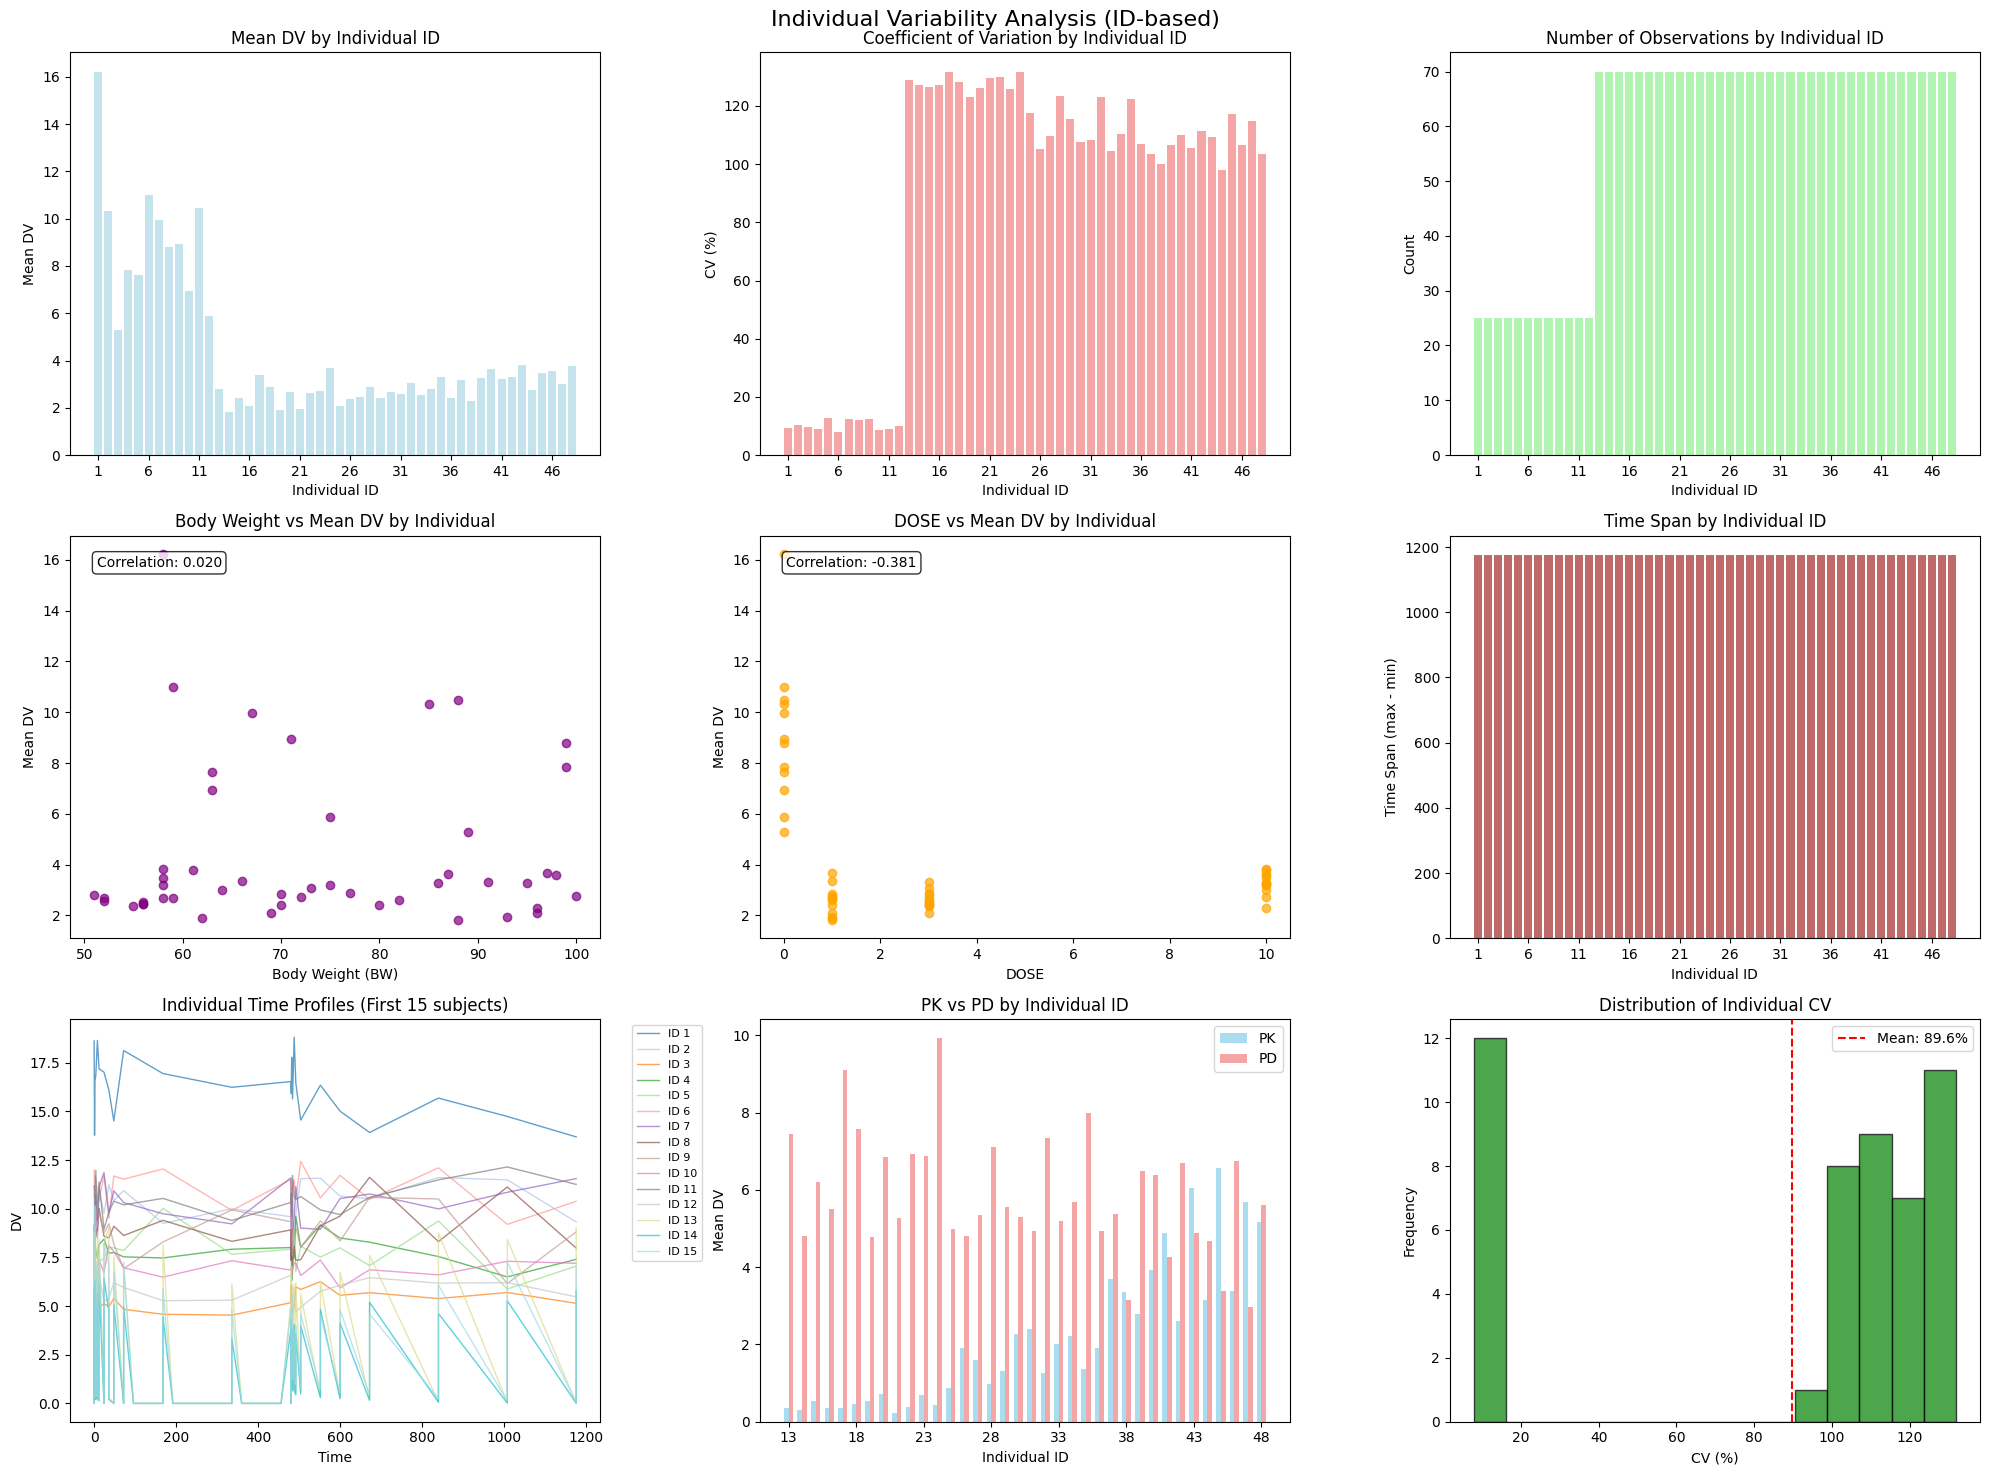

In [28]:
# ID별 개인차 시각화
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Individual Variability Analysis (ID-based)', fontsize=16)

# 1. ID별 평균 DV
id_dv_mean = df.groupby('ID')['DV'].mean()
axes[0, 0].bar(range(len(id_dv_mean)), id_dv_mean.values, alpha=0.7, color='lightblue')
axes[0, 0].set_title('Mean DV by Individual ID')
axes[0, 0].set_xlabel('Individual ID')
axes[0, 0].set_ylabel('Mean DV')
axes[0, 0].set_xticks(range(0, len(id_dv_mean), 5))
axes[0, 0].set_xticklabels(range(1, len(id_dv_mean)+1, 5))

# 2. ID별 변이계수 (CV)
axes[0, 1].bar(range(len(id_stats)), id_stats['CV'].values, alpha=0.7, color='lightcoral')
axes[0, 1].set_title('Coefficient of Variation by Individual ID')
axes[0, 1].set_xlabel('Individual ID')
axes[0, 1].set_ylabel('CV (%)')
axes[0, 1].set_xticks(range(0, len(id_stats), 5))
axes[0, 1].set_xticklabels(range(1, len(id_stats)+1, 5))

# 3. ID별 관측치 수
id_counts = df.groupby('ID').size()
axes[0, 2].bar(range(len(id_counts)), id_counts.values, alpha=0.7, color='lightgreen')
axes[0, 2].set_title('Number of Observations by Individual ID')
axes[0, 2].set_xlabel('Individual ID')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_xticks(range(0, len(id_counts), 5))
axes[0, 2].set_xticklabels(range(1, len(id_counts)+1, 5))

# 4. ID별 BW vs 평균 DV
id_bw = df.groupby('ID')['BW'].first()
axes[1, 0].scatter(id_bw.values, id_dv_mean.values, alpha=0.7, color='purple')
axes[1, 0].set_title('Body Weight vs Mean DV by Individual')
axes[1, 0].set_xlabel('Body Weight (BW)')
axes[1, 0].set_ylabel('Mean DV')
# 상관계수 추가
corr_bw_dv = id_bw.corr(id_dv_mean)
axes[1, 0].text(0.05, 0.95, f'Correlation: {corr_bw_dv:.3f}', 
               transform=axes[1, 0].transAxes, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 5. ID별 DOSE vs 평균 DV
id_dose = df.groupby('ID')['DOSE'].first()
axes[1, 1].scatter(id_dose.values, id_dv_mean.values, alpha=0.7, color='orange')
axes[1, 1].set_title('DOSE vs Mean DV by Individual')
axes[1, 1].set_xlabel('DOSE')
axes[1, 1].set_ylabel('Mean DV')
# 상관계수 추가
corr_dose_dv = id_dose.corr(id_dv_mean)
axes[1, 1].text(0.05, 0.95, f'Correlation: {corr_dose_dv:.3f}', 
               transform=axes[1, 1].transAxes, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 6. ID별 시간 범위
id_time_range = df.groupby('ID')['TIME'].agg(['min', 'max'])
id_time_span = id_time_range['max'] - id_time_range['min']
axes[1, 2].bar(range(len(id_time_span)), id_time_span.values, alpha=0.7, color='brown')
axes[1, 2].set_title('Time Span by Individual ID')
axes[1, 2].set_xlabel('Individual ID')
axes[1, 2].set_ylabel('Time Span (max - min)')
axes[1, 2].set_xticks(range(0, len(id_time_span), 5))
axes[1, 2].set_xticklabels(range(1, len(id_time_span)+1, 5))

# 7. 개인별 시간 프로파일 (처음 15명)
colors = plt.cm.tab20(np.linspace(0, 1, 15))
for i, (id_val, color) in enumerate(zip(range(1, 16), colors)):
    person_data = df[df['ID'] == id_val].sort_values('TIME')
    if len(person_data) > 0:
        axes[2, 0].plot(person_data['TIME'], person_data['DV'], 
                       color=color, alpha=0.7, linewidth=1, label=f'ID {id_val}')
axes[2, 0].set_title('Individual Time Profiles (First 15 subjects)')
axes[2, 0].set_xlabel('Time')
axes[2, 0].set_ylabel('DV')
axes[2, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

# 8. ID별 PK/PD 분리 (PK/PD 데이터가 있는 경우)
if len(pk_data) > 0 and len(pd_data) > 0:
    pk_id_mean = pk_data.groupby('ID')['DV'].mean()
    pd_id_mean = pd_data.groupby('ID')['DV'].mean()
    
    # 공통 ID만 선택
    common_ids = set(pk_id_mean.index) & set(pd_id_mean.index)
    if len(common_ids) > 0:
        common_ids = sorted(common_ids)
        pk_values = [pk_id_mean[id_val] for id_val in common_ids]
        pd_values = [pd_id_mean[id_val] for id_val in common_ids]
        
        x_pos = range(len(common_ids))
        width = 0.35
        
        axes[2, 1].bar([x - width/2 for x in x_pos], pk_values, width, 
                       label='PK', alpha=0.7, color='skyblue')
        axes[2, 1].bar([x + width/2 for x in x_pos], pd_values, width, 
                       label='PD', alpha=0.7, color='lightcoral')
        axes[2, 1].set_title('PK vs PD by Individual ID')
        axes[2, 1].set_xlabel('Individual ID')
        axes[2, 1].set_ylabel('Mean DV')
        axes[2, 1].set_xticks(range(0, len(common_ids), 5))
        axes[2, 1].set_xticklabels(common_ids[::5])
        axes[2, 1].legend()

# 9. 개인차 분포 (CV 히스토그램)
axes[2, 2].hist(id_stats['CV'].values, bins=15, alpha=0.7, color='green', edgecolor='black')
axes[2, 2].set_title('Distribution of Individual CV')
axes[2, 2].set_xlabel('CV (%)')
axes[2, 2].set_ylabel('Frequency')
axes[2, 2].axvline(id_stats['CV'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {id_stats["CV"].mean():.1f}%')
axes[2, 2].legend()

plt.tight_layout()
plt.show()


In [29]:
# BW를 고려한 분석
print("=== BW (Body Weight) 분석 ===")

# BW 기본 통계
print(f"BW 통계:")
print(f"  평균: {df['BW'].mean():.2f} ± {df['BW'].std():.2f}")
print(f"  범위: {df['BW'].min()} ~ {df['BW'].max()}")
print(f"  중앙값: {df['BW'].median():.2f}")

# BW 구간별 분석
bw_quartiles = df['BW'].quantile([0.25, 0.5, 0.75])
print(f"\nBW 사분위수:")
print(f"  Q1 (25%): {bw_quartiles[0.25]:.2f}")
print(f"  Q2 (50%): {bw_quartiles[0.5]:.2f}")
print(f"  Q3 (75%): {bw_quartiles[0.75]:.2f}")

# BW 구간 생성
df['BW_group'] = pd.cut(df['BW'], bins=3, labels=['Low BW', 'Medium BW', 'High BW'])
bw_group_stats = df.groupby('BW_group').agg({
    'ID': 'nunique',
    'DV': ['count', 'mean', 'std'],
    'DOSE': 'first'
}).round(3)

print(f"\nBW 구간별 통계:")
print(bw_group_stats)


=== BW (Body Weight) 분석 ===
BW 통계:
  평균: 73.08 ± 15.73
  범위: 51 ~ 100
  중앙값: 70.00

BW 사분위수:
  Q1 (25%): 58.00
  Q2 (50%): 70.00
  Q3 (75%): 88.00

BW 구간별 통계:
               ID    DV                DOSE
          nunique count   mean    std first
BW_group                                   
Low BW         21  1245  3.612  4.025     0
Medium BW      11   680  3.040  3.358     0
High BW        16   895  3.670  3.880     0


/tmp/ipykernel_1551018/924482074.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bw_group_stats = df.groupby('BW_group').agg({


/tmp/ipykernel_1551018/1052102465.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bw_dose_stats = df.groupby(['BW_group', 'DOSE'])['DV'].mean().unstack()
/tmp/ipykernel_1551018/1052102465.py:86: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bw_group_counts = df.groupby('BW_group')['ID'].nunique()
/tmp/ipykernel_1551018/1052102465.py:95: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bw_group_cv = df.groupby('BW_group

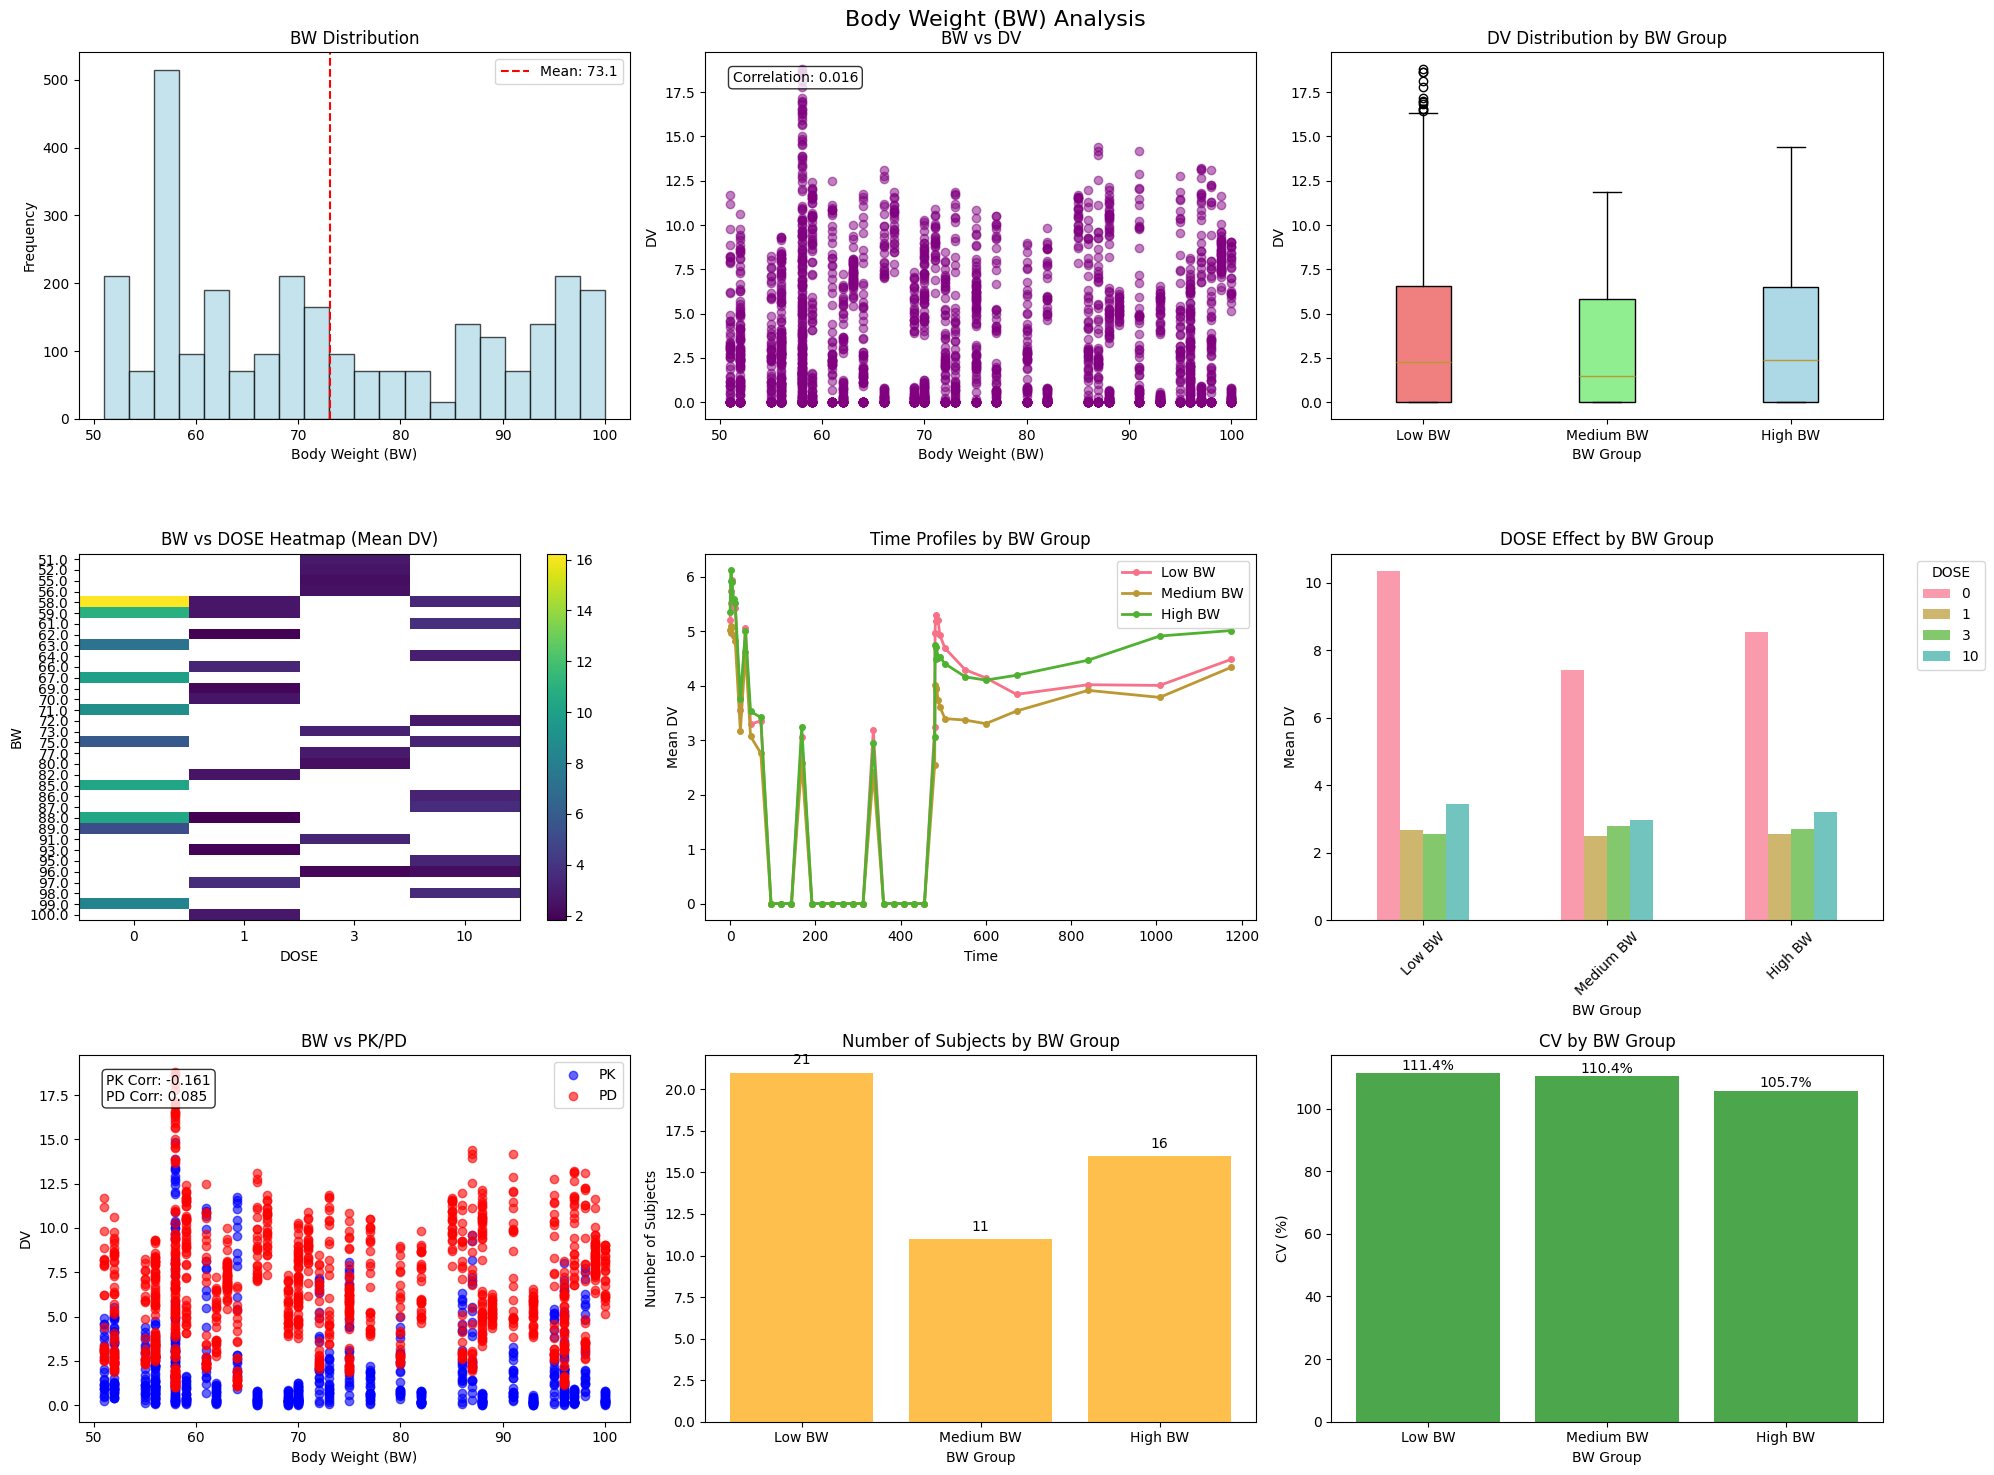

In [30]:
# BW를 고려한 시각화
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Body Weight (BW) Analysis', fontsize=16)

# 1. BW 분포
axes[0, 0].hist(df['BW'], bins=20, alpha=0.7, color='lightblue', edgecolor='black')
axes[0, 0].set_title('BW Distribution')
axes[0, 0].set_xlabel('Body Weight (BW)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['BW'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {df["BW"].mean():.1f}')
axes[0, 0].legend()

# 2. BW vs DV 산점도
axes[0, 1].scatter(df['BW'], df['DV'], alpha=0.5, color='purple')
axes[0, 1].set_title('BW vs DV')
axes[0, 1].set_xlabel('Body Weight (BW)')
axes[0, 1].set_ylabel('DV')
# 상관계수 추가
corr_bw_dv = df['BW'].corr(df['DV'])
axes[0, 1].text(0.05, 0.95, f'Correlation: {corr_bw_dv:.3f}', 
               transform=axes[0, 1].transAxes, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 3. BW 구간별 DV 분포
bw_groups = ['Low BW', 'Medium BW', 'High BW']
bw_dv_data = [df[df['BW_group'] == group]['DV'].values for group in bw_groups]
bp = axes[0, 2].boxplot(bw_dv_data, labels=bw_groups, patch_artist=True)
colors = ['lightcoral', 'lightgreen', 'lightblue']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
axes[0, 2].set_title('DV Distribution by BW Group')
axes[0, 2].set_xlabel('BW Group')
axes[0, 2].set_ylabel('DV')

# 4. BW vs DOSE 관계
bw_dose_pivot = df.pivot_table(values='DV', index='BW', columns='DOSE', aggfunc='mean')
im = axes[1, 0].imshow(bw_dose_pivot.values, cmap='viridis', aspect='auto')
axes[1, 0].set_title('BW vs DOSE Heatmap (Mean DV)')
axes[1, 0].set_xlabel('DOSE')
axes[1, 0].set_ylabel('BW')
axes[1, 0].set_xticks(range(len(bw_dose_pivot.columns)))
axes[1, 0].set_xticklabels(bw_dose_pivot.columns)
axes[1, 0].set_yticks(range(len(bw_dose_pivot.index)))
axes[1, 0].set_yticklabels([f'{bw:.1f}' for bw in bw_dose_pivot.index])
plt.colorbar(im, ax=axes[1, 0])

# 5. BW 구간별 시간 프로파일
for group in bw_groups:
    group_data = df[df['BW_group'] == group]
    if len(group_data) > 0:
        time_avg = group_data.groupby('TIME')['DV'].mean()
        axes[1, 1].plot(time_avg.index, time_avg.values, 'o-', 
                       label=group, linewidth=2, markersize=4)
axes[1, 1].set_title('Time Profiles by BW Group')
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Mean DV')
axes[1, 1].legend()

# 6. BW 구간별 DOSE 효과
bw_dose_stats = df.groupby(['BW_group', 'DOSE'])['DV'].mean().unstack()
bw_dose_stats.plot(kind='bar', ax=axes[1, 2], alpha=0.7)
axes[1, 2].set_title('DOSE Effect by BW Group')
axes[1, 2].set_xlabel('BW Group')
axes[1, 2].set_ylabel('Mean DV')
axes[1, 2].legend(title='DOSE', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 2].tick_params(axis='x', rotation=45)

# 7. BW vs PK/PD (PK/PD 데이터가 있는 경우)
if len(pk_data) > 0 and len(pd_data) > 0:
    axes[2, 0].scatter(pk_data['BW'], pk_data['DV'], alpha=0.6, color='blue', label='PK')
    axes[2, 0].scatter(pd_data['BW'], pd_data['DV'], alpha=0.6, color='red', label='PD')
    axes[2, 0].set_title('BW vs PK/PD')
    axes[2, 0].set_xlabel('Body Weight (BW)')
    axes[2, 0].set_ylabel('DV')
    axes[2, 0].legend()
    
    # 상관계수 추가
    corr_bw_pk = pk_data['BW'].corr(pk_data['DV'])
    corr_bw_pd = pd_data['BW'].corr(pd_data['DV'])
    axes[2, 0].text(0.05, 0.95, f'PK Corr: {corr_bw_pk:.3f}\nPD Corr: {corr_bw_pd:.3f}', 
                   transform=axes[2, 0].transAxes, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 8. BW 구간별 개인 수
bw_group_counts = df.groupby('BW_group')['ID'].nunique()
axes[2, 1].bar(bw_group_counts.index, bw_group_counts.values, alpha=0.7, color='orange')
axes[2, 1].set_title('Number of Subjects by BW Group')
axes[2, 1].set_xlabel('BW Group')
axes[2, 1].set_ylabel('Number of Subjects')
for i, v in enumerate(bw_group_counts.values):
    axes[2, 1].text(i, v + 0.5, str(v), ha='center')

# 9. BW 구간별 변이계수
bw_group_cv = df.groupby('BW_group')['DV'].apply(lambda x: (x.std() / x.mean()) * 100)
axes[2, 2].bar(bw_group_cv.index, bw_group_cv.values, alpha=0.7, color='green')
axes[2, 2].set_title('CV by BW Group')
axes[2, 2].set_xlabel('BW Group')
axes[2, 2].set_ylabel('CV (%)')
for i, v in enumerate(bw_group_cv.values):
    axes[2, 2].text(i, v + 1, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()


In [31]:
# DOSE-ID-BW 조합 분석
print("=== DOSE-ID-BW 조합 분석 ===")

# DOSE-BW 조합별 통계
dose_bw_comb = df.groupby(['DOSE', 'BW_group']).agg({
    'ID': 'nunique',
    'DV': ['count', 'mean', 'std']
}).round(3)

print("DOSE-BW 조합별 통계:")
print(dose_bw_comb)

# 개인별 DOSE-BW 조합
individual_comb = df.groupby('ID').agg({
    'DOSE': 'first',
    'BW': 'first',
    'BW_group': 'first',
    'DV': ['count', 'mean', 'std']
}).round(3)

print(f"\n개인별 DOSE-BW 조합 (처음 10명):")
print(individual_comb.head(10))


=== DOSE-ID-BW 조합 분석 ===
DOSE-BW 조합별 통계:
                    ID    DV               
               nunique count    mean    std
DOSE BW_group                              
0    Low BW          5   125  10.345  3.473
     Medium BW       2    50   7.417  1.784
     High BW         5   125   8.543  2.096
1    Low BW          4   280   2.663  3.495
     Medium BW       4   280   2.489  3.204
     High BW         4   280   2.560  3.534
3    Low BW          7   490   2.550  2.763
     Medium BW       3   210   2.785  3.334
     High BW         2   140   2.700  3.400
10   Low BW          5   350   3.453  3.799
     Medium BW       2   140   2.963  3.005
     High BW         5   350   3.207  3.512

개인별 DOSE-BW 조합 (처음 10명):
    DOSE    BW   BW_group    DV               
   first first      first count    mean    std
ID                                            
1      0    58     Low BW    25  16.228  1.513
2      0    85    High BW    25  10.323  1.050
3      0    89    High BW    25   5.28

/tmp/ipykernel_1551018/3225021614.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dose_bw_comb = df.groupby(['DOSE', 'BW_group']).agg({


/tmp/ipykernel_1551018/1095108839.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dose_bw_count = df.groupby(['DOSE', 'BW_group'])['ID'].nunique().unstack(fill_value=0)
/tmp/ipykernel_1551018/1095108839.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dose_bw_mean = df.groupby(['DOSE', 'BW_group'])['DV'].mean().unstack(fill_value=0)
/tmp/ipykernel_1551018/1095108839.py:98: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warni

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

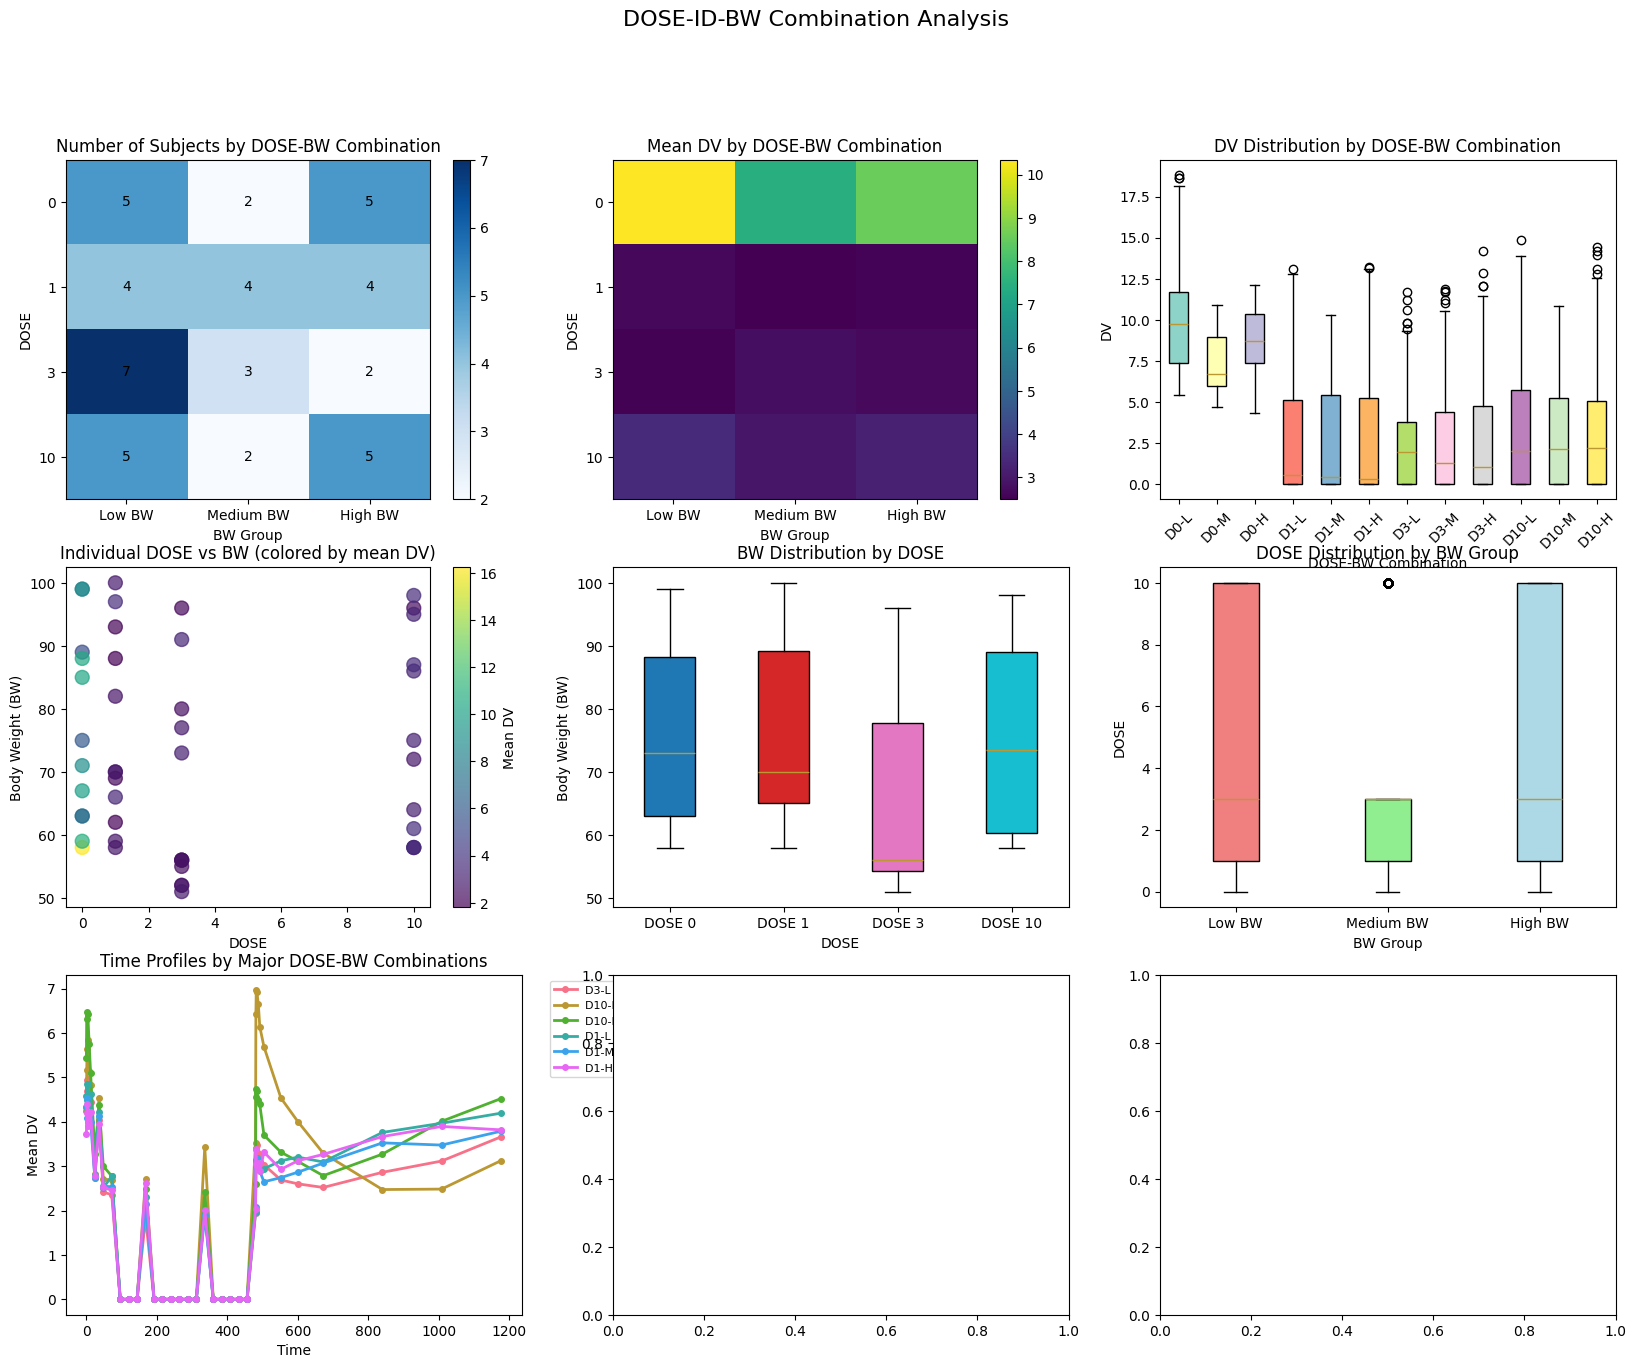

In [32]:
# DOSE-ID-BW 조합 시각화
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('DOSE-ID-BW Combination Analysis', fontsize=16)

# 1. DOSE-BW 조합 히트맵 (개인 수)
dose_bw_count = df.groupby(['DOSE', 'BW_group'])['ID'].nunique().unstack(fill_value=0)
im1 = axes[0, 0].imshow(dose_bw_count.values, cmap='Blues', aspect='auto')
axes[0, 0].set_title('Number of Subjects by DOSE-BW Combination')
axes[0, 0].set_xlabel('BW Group')
axes[0, 0].set_ylabel('DOSE')
axes[0, 0].set_xticks(range(len(dose_bw_count.columns)))
axes[0, 0].set_xticklabels(dose_bw_count.columns)
axes[0, 0].set_yticks(range(len(dose_bw_count.index)))
axes[0, 0].set_yticklabels(dose_bw_count.index)
# 히트맵에 값 표시
for i in range(len(dose_bw_count.index)):
    for j in range(len(dose_bw_count.columns)):
        axes[0, 0].text(j, i, str(dose_bw_count.iloc[i, j]), ha='center', va='center')
plt.colorbar(im1, ax=axes[0, 0])

# 2. DOSE-BW 조합 히트맵 (평균 DV)
dose_bw_mean = df.groupby(['DOSE', 'BW_group'])['DV'].mean().unstack(fill_value=0)
im2 = axes[0, 1].imshow(dose_bw_mean.values, cmap='viridis', aspect='auto')
axes[0, 1].set_title('Mean DV by DOSE-BW Combination')
axes[0, 1].set_xlabel('BW Group')
axes[0, 1].set_ylabel('DOSE')
axes[0, 1].set_xticks(range(len(dose_bw_mean.columns)))
axes[0, 1].set_xticklabels(dose_bw_mean.columns)
axes[0, 1].set_yticks(range(len(dose_bw_mean.index)))
axes[0, 1].set_yticklabels(dose_bw_mean.index)
plt.colorbar(im2, ax=axes[0, 1])

# 3. DOSE-BW 조합별 박스플롯
dose_bw_combinations = []
labels = []
for dose in sorted(df['DOSE'].unique()):
    for bw_group in ['Low BW', 'Medium BW', 'High BW']:
        combo_data = df[(df['DOSE'] == dose) & (df['BW_group'] == bw_group)]['DV']
        if len(combo_data) > 0:
            dose_bw_combinations.append(combo_data.values)
            labels.append(f'D{dose}-{bw_group[0]}')

if dose_bw_combinations:
    bp = axes[0, 2].boxplot(dose_bw_combinations, labels=labels, patch_artist=True)
    colors = plt.cm.Set3(np.linspace(0, 1, len(dose_bw_combinations)))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    axes[0, 2].set_title('DV Distribution by DOSE-BW Combination')
    axes[0, 2].set_xlabel('DOSE-BW Combination')
    axes[0, 2].set_ylabel('DV')
    axes[0, 2].tick_params(axis='x', rotation=45)

# 4. 개인별 DOSE vs BW 산점도 (색상으로 DV 평균 표시)
scatter = axes[1, 0].scatter(individual_comb[('DOSE', 'first')], 
                           individual_comb[('BW', 'first')], 
                           c=individual_comb[('DV', 'mean')], 
                           cmap='viridis', s=100, alpha=0.7)
axes[1, 0].set_title('Individual DOSE vs BW (colored by mean DV)')
axes[1, 0].set_xlabel('DOSE')
axes[1, 0].set_ylabel('Body Weight (BW)')
plt.colorbar(scatter, ax=axes[1, 0], label='Mean DV')

# 5. DOSE별 BW 분포
dose_bw_dist = []
dose_labels = []
for dose in sorted(df['DOSE'].unique()):
    dose_data = df[df['DOSE'] == dose]['BW']
    if len(dose_data) > 0:
        dose_bw_dist.append(dose_data.values)
        dose_labels.append(f'DOSE {dose}')

bp = axes[1, 1].boxplot(dose_bw_dist, labels=dose_labels, patch_artist=True)
colors = plt.cm.tab10(np.linspace(0, 1, len(dose_bw_dist)))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
axes[1, 1].set_title('BW Distribution by DOSE')
axes[1, 1].set_xlabel('DOSE')
axes[1, 1].set_ylabel('Body Weight (BW)')

# 6. BW별 DOSE 분포
bw_dose_dist = []
bw_labels = []
for bw_group in ['Low BW', 'Medium BW', 'High BW']:
    bw_data = df[df['BW_group'] == bw_group]['DOSE']
    if len(bw_data) > 0:
        bw_dose_dist.append(bw_data.values)
        bw_labels.append(bw_group)

bp = axes[1, 2].boxplot(bw_dose_dist, labels=bw_labels, patch_artist=True)
colors = ['lightcoral', 'lightgreen', 'lightblue']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
axes[1, 2].set_title('DOSE Distribution by BW Group')
axes[1, 2].set_xlabel('BW Group')
axes[1, 2].set_ylabel('DOSE')

# 7. DOSE-BW 조합별 시간 프로파일 (주요 조합만)
major_combinations = df.groupby(['DOSE', 'BW_group']).size().sort_values(ascending=False).head(6)
for (dose, bw_group), count in major_combinations.items():
    combo_data = df[(df['DOSE'] == dose) & (df['BW_group'] == bw_group)]
    if len(combo_data) > 0:
        time_avg = combo_data.groupby('TIME')['DV'].mean()
        axes[2, 0].plot(time_avg.index, time_avg.values, 'o-', 
                       label=f'D{dose}-{bw_group[0]} (n={count})', 
                       linewidth=2, markersize=4)
axes[2, 0].set_title('Time Profiles by Major DOSE-BW Combinations')
axes[2, 0].set_xlabel('Time')
axes[2, 0].set_ylabel('Mean DV')
axes[2, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

# 8. 개인별 변이계수 vs DOSE-BW 조합
individual_cv = individual_comb[('DV', 'std')] / individual_comb[('DV', 'mean')] * 100
dose_bw_cv = individual_comb.groupby([('DOSE', 'first'), ('BW_group', 'first')])[('DV', 'mean')].apply(
    lambda x: (individual_comb.loc[x.index, ('DV', 'std')] / individual_comb.loc[x.index, ('DV', 'mean')] * 100).mean()
).unstack(fill_value=0)

im3 = axes[2, 1].imshow(dose_bw_cv.values, cmap='Reds', aspect='auto')
axes[2, 1].set_title('Mean CV by DOSE-BW Combination')
axes[2, 1].set_xlabel('BW Group')
axes[2, 1].set_ylabel('DOSE')
axes[2, 1].set_xticks(range(len(dose_bw_cv.columns)))
axes[2, 1].set_xticklabels(dose_bw_cv.columns)
axes[2, 1].set_yticks(range(len(dose_bw_cv.index)))
axes[2, 1].set_yticklabels(dose_bw_cv.index)
plt.colorbar(im3, ax=axes[2, 1], label='CV (%)')

# 9. DOSE-BW 조합별 PK/PD 비교 (PK/PD 데이터가 있는 경우)
if len(pk_data) > 0 and len(pd_data) > 0:
    pk_dose_bw = pk_data.groupby(['DOSE', 'BW_group'])['DV'].mean().unstack(fill_value=0)
    pd_dose_bw = pd_data.groupby(['DOSE', 'BW_group'])['DV'].mean().unstack(fill_value=0)
    
    # PK 데이터
    im4 = axes[2, 2].imshow(pk_dose_bw.values, cmap='Blues', aspect='auto', alpha=0.7)
    # PD 데이터 (오버레이)
    im5 = axes[2, 2].imshow(pd_dose_bw.values, cmap='Reds', aspect='auto', alpha=0.7)
    
    axes[2, 2].set_title('PK (Blue) vs PD (Red) by DOSE-BW')
    axes[2, 2].set_xlabel('BW Group')
    axes[2, 2].set_ylabel('DOSE')
    axes[2, 2].set_xticks(range(len(pk_dose_bw.columns)))
    axes[2, 2].set_xticklabels(pk_dose_bw.columns)
    axes[2, 2].set_yticks(range(len(pk_dose_bw.index)))
    axes[2, 2].set_yticklabels(pk_dose_bw.index)

plt.tight_layout()
plt.show()

# 종합 분석 결과
print("\n=== 종합 분석 결과 ===")
print(f"총 {df['ID'].nunique()}명의 개인이 {df['DOSE'].nunique()}개의 서로 다른 용량으로 연구 참여")
print(f"BW 범위: {df['BW'].min()} ~ {df['BW'].max()}")
print(f"가장 많은 조합: DOSE {dose_bw_count.stack().idxmax()[0]}, {dose_bw_count.stack().idxmax()[1]} ({dose_bw_count.stack().max()}명)")
print(f"가장 적은 조합: DOSE {dose_bw_count.stack().idxmin()[0]}, {dose_bw_count.stack().idxmin()[1]} ({dose_bw_count.stack().min()}명)")
